# Function approximation by global functions
<div id="ch:approx:global"></div>

Many successful numerical solution methods for differential equations,
including the finite element method,
aim at approximating the unknown function by a sum

<!-- Equation labels as ordinary links -->
<div id="fem:u"></div>

$$
\begin{equation}
 u(x) \approx \sum_{i=0}^N c_i{\psi}_i(x),
\label{fem:u} \tag{1}
\end{equation}
$$

where ${\psi}_i(x)$ are prescribed functions and $c_0,\ldots,c_N$
are unknown coefficients to be determined.
Solution methods for differential equations
utilizing ([1](#fem:u)) must
have a *principle* for constructing $N+1$ equations to
determine $c_0,\ldots,c_N$. Then there is a *machinery* regarding
the actual construction of the equations for $c_0,\ldots,c_N$, in a
particular problem. Finally, there is a *solve* phase for computing
the solution $c_0,\ldots,c_N$ of the $N+1$ equations.

Especially in the finite element method, the machinery for
constructing the discrete equations to be implemented on a computer is
quite comprehensive, with many mathematical and implementational
details entering the scene at the same time. From an ease-of-learning
perspective it can therefore be wise to introduce the computational machinery
for a trivial equation: $u=f$. Solving this equation with $f$ given
and $u$ of the form ([1](#fem:u)), means that we seek an approximation
$u$ to $f$.  This approximation problem has the advantage of
introducing most of the finite element toolbox, but without involving
demanding topics related to differential equations (e.g., integration
by parts, boundary conditions, and coordinate mappings).  This is the
reason why we shall first become familiar with finite element
*approximation* before addressing finite element methods for
differential equations.

First, we refresh some linear algebra concepts about approximating
vectors in vector spaces. Second, we extend these concepts to
approximating functions in function spaces, using the same principles
and the same notation.  We present examples on approximating functions
by global basis functions with support throughout the entire
domain. That is, the functions are in general nonzero on the entire
domain.  Third, we introduce the finite element type of basis
functions globally.  These basis functions will later,
in [Function approximation by finite elements](#ch:approx:fe),
be used with local support
(meaning that each function is nonzero except in a small part of the domain)
to enhance stability and efficiency.
We explain all the details of the
computational algorithms involving such functions.  Four types of
approximation principles are covered: 1) the least squares method, 2)
the $L_2$ projection or Galerkin method, 3) interpolation or
collocation, and 4) the regression method.

# Approximation of vectors
<div id="fem:approx:vec"></div>

We shall start by introducing two fundamental methods for
determining the coefficients $c_i$ in ([1](#fem:u)). These methods
will be introduced for
approximation of vectors. Using vectors in vector
spaces to bring across the ideas is believed to be more intuitive
to the reader than starting directly with functions in function spaces.
The extension from vectors to functions will be trivial as soon as
the fundamental ideas are understood.


The first method of approximation is called the *least squares method*
and consists in finding $c_i$ such that the difference $f-u$, measured
in a certain norm, is minimized. That is, we aim at finding the best
approximation $u$ to $f$, with the given norm as measure of "distance".
The second method is not
as intuitive: we find $u$ such that the error $f-u$ is orthogonal to
the space where $u$ lies. This is known as *projection*, or
in the context of differential equations, the idea is
also well known as *Galerkin's method*.
When approximating vectors and functions, the two methods are
equivalent, but this is no longer the case when applying the
principles to differential equations.


## Approximation of planar vectors
<div id="fem:approx:vec:plane"></div>

Let $\boldsymbol{f} = (3,5)$ be a vector in the $xy$ plane and suppose we want to
approximate this vector by a vector aligned in the direction of
another vector that is restricted to be aligned with some vector
$(a,b)$. [Figure](#fem:approx:vec:plane:fig) depicts the
situation. This is the simplest approximation problem for
vectors. Nevertheless, for many readers it will be wise to refresh
some basic linear algebra by consulting a textbook. Familiarity with fundamental operations on inner product vector spaces are assumed in the forthcoming text.



<!-- dom:FIGURE: [fig/vecapprox_plane.png, width=400] Approximation of a two-dimensional vector in a one-dimensional vector space. <div id="fem:approx:vec:plane:fig"></div> -->
<!-- begin figure -->
<div id="fem:approx:vec:plane:fig"></div>

<p>Approximation of a two-dimensional vector in a one-dimensional vector space.</p>
<img src="fig/vecapprox_plane.png" width=400>

<!-- end figure -->


We introduce the vector space $V$
spanned by the vector $\boldsymbol{\psi}_0=(a,b)$:

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
V = \mbox{span}\,\{ \boldsymbol{\psi}_0\}{\thinspace .}   \label{_auto1} \tag{2}
\end{equation}
$$

We say that $\boldsymbol{\psi}_0$ is a *basis vector* in the space $V$.
Our aim is to find the vector

<!-- Equation labels as ordinary links -->
<div id="uc0"></div>

$$
\begin{equation}
\label{uc0} \tag{3}
\boldsymbol{u} = c_0\boldsymbol{\psi}_0\in V
\end{equation}
$$

which best approximates
the given vector $\boldsymbol{f} = (3,5)$. A reasonable criterion for a best
approximation could be to minimize the length of the difference between
the approximate $\boldsymbol{u}$ and the given $\boldsymbol{f}$. The difference, or error
$\boldsymbol{e} = \boldsymbol{f} -\boldsymbol{u}$, has its length given by the *norm*

$$
||\boldsymbol{e}|| = (\boldsymbol{e},\boldsymbol{e})^{\frac{1}{2}},
$$

where $(\boldsymbol{e},\boldsymbol{e})$ is the *inner product* of $\boldsymbol{e}$ and itself. The inner
product, also called *scalar product* or *dot product*, of two vectors
$\boldsymbol{u}=(u_0,u_1)$ and $\boldsymbol{v} =(v_0,v_1)$ is defined as

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
(\boldsymbol{u}, \boldsymbol{v}) = u_0v_0 + u_1v_1{\thinspace .}   \label{_auto2} \tag{4}
\end{equation}
$$

**Remark.** We should point out that we use the notation
$(\cdot,\cdot)$ for two different things: $(a,b)$ for scalar
quantities $a$ and $b$ means the vector starting at the origin and
ending in the point $(a,b)$, while $(\boldsymbol{u},\boldsymbol{v})$ with vectors $\boldsymbol{u}$ and
$\boldsymbol{v}$ means the inner product of these vectors.  Since vectors are here
written in boldface font there should be no confusion.  We may add
that the norm associated with this inner product is the usual
Euclidean length of a vector, i.e.,

$$
\|\boldsymbol{u}\| = \sqrt{(\boldsymbol{u},\boldsymbol{u})} = \sqrt{u_0^2 + u_1^2}
$$

### The least squares method

We now want to determine the $\boldsymbol{u}$ that minimizes  $||\boldsymbol{e}||$, that is
we want to compute the optimal $c_0$ in ([3](#uc0)). The algebra
is simplified if we minimize the square of the norm, $||\boldsymbol{e}||^2 = (\boldsymbol{e}, \boldsymbol{e})$,
instead of the norm itself.
Define the function

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
E(c_0) = (\boldsymbol{e},\boldsymbol{e}) = (\boldsymbol{f} - c_0\boldsymbol{\psi}_0, \boldsymbol{f} - c_0\boldsymbol{\psi}_0)
{\thinspace .}
\label{_auto3} \tag{5}
\end{equation}
$$

We can rewrite the expressions of the right-hand side in a more
convenient form for further use:

<!-- Equation labels as ordinary links -->
<div id="fem:vec:E"></div>

$$
\begin{equation}
E(c_0) = (\boldsymbol{f},\boldsymbol{f}) - 2c_0(\boldsymbol{f},\boldsymbol{\psi}_0) + c_0^2(\boldsymbol{\psi}_0,\boldsymbol{\psi}_0){\thinspace .}
\label{fem:vec:E} \tag{6}
\end{equation}
$$

This rewrite results from using the following fundamental rules for inner
product spaces:

<!-- Equation labels as ordinary links -->
<div id="fem:vec:rule:scalarmult"></div>

$$
\begin{equation}
(\alpha\boldsymbol{u},\boldsymbol{v})=\alpha(\boldsymbol{u},\boldsymbol{v}),\quad \alpha\in\mathbb{R},
\label{fem:vec:rule:scalarmult} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="fem:vec:rule:sum"></div>

$$
\begin{equation}
(\boldsymbol{u} +\boldsymbol{v},\boldsymbol{w}) = (\boldsymbol{u},\boldsymbol{w}) + (\boldsymbol{v}, \boldsymbol{w}),
\label{fem:vec:rule:sum} \tag{8}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="fem:vec:rule:symmetry"></div>

$$
\begin{equation}
\label{fem:vec:rule:symmetry} \tag{9}
(\boldsymbol{u}, \boldsymbol{v}) = (\boldsymbol{v}, \boldsymbol{u}){\thinspace .}
\end{equation}
$$

Minimizing $E(c_0)$ implies finding $c_0$ such that

$$
\frac{\partial E}{\partial c_0} = 0{\thinspace .}
$$

It turns out that $E$ has one unique minimum and no maximum point.
Now, when differentiating ([6](#fem:vec:E)) with respect to $c_0$, note
that none of the inner product expressions depend on $c_0$, so we simply get

<!-- Equation labels as ordinary links -->
<div id="fem:vec:dEdc0:v1"></div>

$$
\begin{equation}
\frac{\partial E}{\partial c_0} = -2(\boldsymbol{f},\boldsymbol{\psi}_0) + 2c_0 (\boldsymbol{\psi}_0,\boldsymbol{\psi}_0)
{\thinspace .}
\label{fem:vec:dEdc0:v1} \tag{10}
\end{equation}
$$

Setting the above expression equal to zero and solving for $c_0$ gives

<!-- Equation labels as ordinary links -->
<div id="fem:vec:c0"></div>

$$
\begin{equation}
c_0 = \frac{(\boldsymbol{f},\boldsymbol{\psi}_0)}{(\boldsymbol{\psi}_0,\boldsymbol{\psi}_0)},
\label{fem:vec:c0} \tag{11}
\end{equation}
$$

which in the present case, with $\boldsymbol{\psi}_0=(a,b)$, results in

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
c_0 = \frac{3a + 5b}{a^2 + b^2}{\thinspace .}   \label{_auto4} \tag{12}
\end{equation}
$$

For later, it is worth mentioning that setting
the key equation ([10](#fem:vec:dEdc0:v1)) to zero and ordering
the terms lead to

$$
(\boldsymbol{f}-c_0\boldsymbol{\psi}_0,\boldsymbol{\psi}_0) = 0,
$$

or

<!-- Equation labels as ordinary links -->
<div id="fem:vec:dEdc0:Galerkin"></div>

$$
\begin{equation}
(\boldsymbol{e}, \boldsymbol{\psi}_0) = 0
{\thinspace .}
\label{fem:vec:dEdc0:Galerkin} \tag{13}
\end{equation}
$$

This implication of minimizing $E$ is an important result that we shall
make much use of.




### The projection method

We shall now show that minimizing $||\boldsymbol{e}||^2$ implies that $\boldsymbol{e}$ is
orthogonal to *any* vector $\boldsymbol{v}$ in the space $V$. This result is
visually quite clear from [Figure](#fem:approx:vec:plane:fig) (think of
other vectors along the line $(a,b)$: all of them will lead to
a larger distance between the approximation and $\boldsymbol{f}$).
Then we see mathematically that $\boldsymbol{e}$ is orthogonal to any vector $\boldsymbol{v}$
in the space $V$ and we may
express any $\boldsymbol{v}\in V$ as $\boldsymbol{v}=s\boldsymbol{\psi}_0$ for any scalar parameter $s$
(recall that two vectors are orthogonal when their inner product vanishes).
Then we calculate the inner product

$$
\begin{align*}
(\boldsymbol{e}, s\boldsymbol{\psi}_0) &= (\boldsymbol{f} - c_0\boldsymbol{\psi}_0, s\boldsymbol{\psi}_0)\\
&= (\boldsymbol{f},s\boldsymbol{\psi}_0) - (c_0\boldsymbol{\psi}_0, s\boldsymbol{\psi}_0)\\
&= s(\boldsymbol{f},\boldsymbol{\psi}_0) - sc_0(\boldsymbol{\psi}_0, \boldsymbol{\psi}_0)\\
&= s(\boldsymbol{f},\boldsymbol{\psi}_0) - s\frac{(\boldsymbol{f},\boldsymbol{\psi}_0)}{(\boldsymbol{\psi}_0,\boldsymbol{\psi}_0)}(\boldsymbol{\psi}_0,\boldsymbol{\psi}_0)\\
&= s\left( (\boldsymbol{f},\boldsymbol{\psi}_0) - (\boldsymbol{f},\boldsymbol{\psi}_0)\right)\\
&=0{\thinspace .}
\end{align*}
$$

Therefore, instead of minimizing the square of the norm, we could
demand that $\boldsymbol{e}$ is orthogonal to any vector in $V$, which in our present
simple case amounts to a single vector only.
This method is known as *projection*.
(The approach can also be referred to as a Galerkin method as
explained at the end of the section [Approximation of general vectors](#fem:approx:vec:Np1dim).)

Mathematically, the projection method is stated
by the equation

<!-- Equation labels as ordinary links -->
<div id="fem:vec:Galerkin1"></div>

$$
\begin{equation}
(\boldsymbol{e}, \boldsymbol{v}) = 0,\quad\forall\boldsymbol{v}\in V{\thinspace .}
\label{fem:vec:Galerkin1} \tag{14}
\end{equation}
$$

An arbitrary $\boldsymbol{v}\in V$ can be expressed as
$s\boldsymbol{\psi}_0$, $s\in\mathbb{R}$, and therefore
([14](#fem:vec:Galerkin1)) implies

$$
(\boldsymbol{e},s\boldsymbol{\psi}_0) = s(\boldsymbol{e}, \boldsymbol{\psi}_0) = 0,
$$

which means that the error must be orthogonal to the basis vector in
the space $V$:

$$
(\boldsymbol{e}, \boldsymbol{\psi}_0)=0\quad\hbox{or}\quad
(\boldsymbol{f} - c_0\boldsymbol{\psi}_0, \boldsymbol{\psi}_0)=0,
$$

which is what we found in ([13](#fem:vec:dEdc0:Galerkin)) from
the least squares computations.




## Approximation of general vectors
<div id="fem:approx:vec:Np1dim"></div>


Let us generalize the vector approximation from the previous section
to vectors in spaces with arbitrary dimension. Given some vector $\boldsymbol{f}$,
we want to find the best approximation to this vector in
the space

$$
V = \hbox{span}\,\{\boldsymbol{\psi}_0,\ldots,\boldsymbol{\psi}_N\}
{\thinspace .}
$$

We assume that the space has dimension $N+1$ and
that *basis vectors* $\boldsymbol{\psi}_0,\ldots,\boldsymbol{\psi}_N$ are
linearly independent so that none of them are redundant.
Any vector $\boldsymbol{u}\in V$ can then be written as a linear combination
of the basis vectors, i.e.,

$$
\boldsymbol{u} = \sum_{j=0}^N c_j\boldsymbol{\psi}_j,
$$

where $c_j\in\mathbb{R}$ are scalar coefficients to be determined.

### The least squares method

Now we want to find $c_0,\ldots,c_N$, such that $\boldsymbol{u}$ is the best
approximation to $\boldsymbol{f}$ in the sense that the distance (error)
$\boldsymbol{e} = \boldsymbol{f} - \boldsymbol{u}$ is minimized. Again, we define
the squared distance as a function of the free parameters
$c_0,\ldots,c_N$,

$$
E(c_0,\ldots,c_N) = (\boldsymbol{e},\boldsymbol{e}) = (\boldsymbol{f} -\sum_jc_j\boldsymbol{\psi}_j,\boldsymbol{f} -\sum_jc_j\boldsymbol{\psi}_j)
\nonumber
$$

<!-- Equation labels as ordinary links -->
<div id="fem:vec:genE"></div>

$$
\begin{equation} 
= (\boldsymbol{f},\boldsymbol{f}) - 2\sum_{j=0}^N c_j(\boldsymbol{f},\boldsymbol{\psi}_j) +
\sum_{p=0}^N\sum_{q=0}^N c_pc_q(\boldsymbol{\psi}_p,\boldsymbol{\psi}_q){\thinspace .}
\label{fem:vec:genE} \tag{15}
\end{equation}
$$

Minimizing this $E$ with respect to the independent variables
$c_0,\ldots,c_N$ is obtained by requiring

$$
\frac{\partial E}{\partial c_i} = 0,\quad i=0,\ldots,N
{\thinspace .}
$$

The first term in ([15](#fem:vec:genE)) is independent of $c_i$, so its
derivative vanishes.
The second term in ([15](#fem:vec:genE)) is differentiated as follows:

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation}
\frac{\partial}{\partial c_i}
2\sum_{j=0}^N c_j(\boldsymbol{f},\boldsymbol{\psi}_j) = 2(\boldsymbol{f},\boldsymbol{\psi}_i),
\label{_auto5} \tag{16}
\end{equation}
$$

since the expression to be differentiated is a sum and only one term,
$c_i(\boldsymbol{f},\boldsymbol{\psi}_i)$,
contains $c_i$ (this term is linear in $c_i$).
To understand this differentiation in detail,
write out the sum specifically for,
e.g, $N=3$ and $i=1$.

The last term in ([15](#fem:vec:genE))
is more tedious to differentiate. It can be wise to write out the
double sum for $N=1$ and perform differentiation with respect to
$c_0$ and $c_1$ to see the structure of the expression. Thereafter,
one can generalize to an arbitrary $N$ and observe that

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
\frac{\partial}{\partial c_i}
c_pc_q =
\left\lbrace\begin{array}{ll}
0, & \hbox{ if } p\neq i\hbox{ and } q\neq i,\\
c_q, & \hbox{ if } p=i\hbox{ and } q\neq i,\\
c_p, & \hbox{ if } p\neq i\hbox{ and } q=i,\\
2c_i, & \hbox{ if } p=q= i{\thinspace .}\\
\end{array}\right.
\label{_auto6} \tag{17}
\end{equation}
$$

Then

$$
\frac{\partial}{\partial c_i}
\sum_{p=0}^N\sum_{q=0}^N c_pc_q(\boldsymbol{\psi}_p,\boldsymbol{\psi}_q)
= \sum_{p=0, p\neq i}^N c_p(\boldsymbol{\psi}_p,\boldsymbol{\psi}_i)
+ \sum_{q=0, q\neq i}^N c_q(\boldsymbol{\psi}_i,\boldsymbol{\psi}_q)
+2c_i(\boldsymbol{\psi}_i,\boldsymbol{\psi}_i){\thinspace .}
$$

Since each of the two sums is missing the term $c_i(\boldsymbol{\psi}_i,\boldsymbol{\psi}_i)$,
we may split the very last term in two, to get exactly that "missing"
term for each sum. This idea allows us to write

<!-- Equation labels as ordinary links -->
<div id="_auto7"></div>

$$
\begin{equation}
\frac{\partial}{\partial c_i}
\sum_{p=0}^N\sum_{q=0}^N c_pc_q(\boldsymbol{\psi}_p,\boldsymbol{\psi}_q)
= 2\sum_{j=0}^N c_i(\boldsymbol{\psi}_j,\boldsymbol{\psi}_i){\thinspace .}
\label{_auto7} \tag{18}
\end{equation}
$$

It then follows that setting

$$
\frac{\partial E}{\partial c_i} = 0,\quad i=0,\ldots,N,
$$

implies

$$
- 2(\boldsymbol{f},\boldsymbol{\psi}_i) + 2\sum_{j=0}^N c_i(\boldsymbol{\psi}_j,\boldsymbol{\psi}_i) = 0,\quad i=0,\ldots,N{\thinspace .}
$$

Moving the first term to the right-hand side shows that the equation is
actually a *linear system* for the unknown parameters $c_0,\ldots,c_N$:

<!-- Equation labels as ordinary links -->
<div id="fem:approx:vec:Np1dim:eqsys"></div>

$$
\begin{equation}
\sum_{j=0}^N A_{i,j} c_j = b_i, \quad i=0,\ldots,N,
\label{fem:approx:vec:Np1dim:eqsys} \tag{19}
\end{equation}
$$

where

<!-- Equation labels as ordinary links -->
<div id="_auto8"></div>

$$
\begin{equation}
A_{i,j} = (\boldsymbol{\psi}_i,\boldsymbol{\psi}_j),
\label{_auto8} \tag{20}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto9"></div>

$$
\begin{equation} 
b_i = (\boldsymbol{\psi}_i, \boldsymbol{f}){\thinspace .}   \label{_auto9} \tag{21}
\end{equation}
$$

We have changed the order of the two vectors in the inner
product according to ([9](#fem:vec:rule:symmetry)):

$$
A_{i,j} = (\boldsymbol{\psi}_j,\boldsymbol{\psi}_i) = (\boldsymbol{\psi}_i,\boldsymbol{\psi}_j),
$$

simply because the sequence $i$-$j$ looks more aesthetic.

### The Galerkin or projection method

In analogy with the "one-dimensional" example in
the section [Approximation of planar vectors](#fem:approx:vec:plane), it holds also here in the general
case that minimizing the distance
(error) $\boldsymbol{e}$ is equivalent to demanding that $\boldsymbol{e}$ is orthogonal to
all $\boldsymbol{v}\in V$:

<!-- Equation labels as ordinary links -->
<div id="fem:approx:vec:Np1dim:Galerkin"></div>

$$
\begin{equation}
(\boldsymbol{e},\boldsymbol{v})=0,\quad \forall\boldsymbol{v}\in V{\thinspace .}
\label{fem:approx:vec:Np1dim:Galerkin} \tag{22}
\end{equation}
$$

Since any $\boldsymbol{v}\in V$ can be written as $\boldsymbol{v} =\sum_{i=0}^N c_i\boldsymbol{\psi}_i$,
the statement ([22](#fem:approx:vec:Np1dim:Galerkin)) is equivalent to
saying that

$$
(\boldsymbol{e}, \sum_{i=0}^N c_i\boldsymbol{\psi}_i) = 0,
$$

for any choice of coefficients $c_0,\ldots,c_N$.
The latter equation can be rewritten as

$$
\sum_{i=0}^N c_i (\boldsymbol{e},\boldsymbol{\psi}_i) =0{\thinspace .}
$$

If this is to hold for arbitrary values of $c_0,\ldots,c_N$,
we must require that each term in the sum vanishes, which means that

<!-- Equation labels as ordinary links -->
<div id="fem:approx:vec:Np1dim:Galerkin0"></div>

$$
\begin{equation}
(\boldsymbol{e},\boldsymbol{\psi}_i)=0,\quad i=0,\ldots,N{\thinspace .}
\label{fem:approx:vec:Np1dim:Galerkin0} \tag{23}
\end{equation}
$$

These $N+1$ equations result in the same linear system as
([19](#fem:approx:vec:Np1dim:eqsys)):

$$
(\boldsymbol{f} - \sum_{j=0}^N c_j\boldsymbol{\psi}_j, \boldsymbol{\psi}_i) = (\boldsymbol{f}, \boldsymbol{\psi}_i) - \sum_{j=0}^N
(\boldsymbol{\psi}_i,\boldsymbol{\psi}_j)c_j = 0,
$$

and hence

$$
\sum_{j=0}^N (\boldsymbol{\psi}_i,\boldsymbol{\psi}_j)c_j = (\boldsymbol{f}, \boldsymbol{\psi}_i),\quad i=0,\ldots, N
{\thinspace .}
$$

So, instead of differentiating the
$E(c_0,\ldots,c_N)$ function, we could simply use
([22](#fem:approx:vec:Np1dim:Galerkin)) as the principle for
determining $c_0,\ldots,c_N$, resulting in the $N+1$
equations ([23](#fem:approx:vec:Np1dim:Galerkin0)).

The names *least squares method* or *least squares approximation*
are natural since the calculations consists of
minimizing $||\boldsymbol{e}||^2$, and $||\boldsymbol{e}||^2$ is a sum of squares
of differences between the components in $\boldsymbol{f}$ and $\boldsymbol{u}$.
We find $\boldsymbol{u}$ such that this sum of squares is minimized.

The principle ([22](#fem:approx:vec:Np1dim:Galerkin)),
or the equivalent form ([23](#fem:approx:vec:Np1dim:Galerkin0)),
is known as *projection*. Almost the same mathematical idea
was used by the Russian mathematician [Boris Galerkin](http://en.wikipedia.org/wiki/Boris_Galerkin) to solve
differential equations, resulting in what is widely known as
*Galerkin's method*.

# Approximation principles
<div id="fem:approx:global"></div>

Let $V$ be a function space spanned by a set of *basis functions*
${\psi}_0,\ldots,{\psi}_N$,

$$
V = \hbox{span}\,\{{\psi}_0,\ldots,{\psi}_N\},
$$

such that any function $u\in V$ can be written as a linear
combination of the basis functions:

<!-- Equation labels as ordinary links -->
<div id="fem:approx:ufem"></div>

$$
\begin{equation}
\label{fem:approx:ufem} \tag{24}
u = \sum_{j\in{\mathcal{I}_s}} c_j{\psi}_j{\thinspace .}
\end{equation}
$$

That is, we consider functions as vectors in a vector space - a
so-called function space - and we have a finite set of basis
functions that span the space just as basis vectors or unit vectors
span a vector space.

The index set ${\mathcal{I}_s}$ is defined as ${\mathcal{I}_s} =\{0,\ldots,N\}$ and is
from now on used
both for compact notation and for flexibility in the numbering of
elements in sequences.

For now, in this introduction, we shall look at functions of a
single variable $x$:
$u=u(x)$, ${\psi}_j={\psi}_j(x)$, $j\in{\mathcal{I}_s}$. Later, we will almost
trivially extend the mathematical details
to functions of two- or three-dimensional physical spaces.
The approximation ([24](#fem:approx:ufem)) is typically used
to discretize a problem in space. Other methods, most notably
finite differences, are common for time discretization, although the
form ([24](#fem:approx:ufem)) can be used in time as well.

## The least squares method
<div id="fem:approx:LS"></div>

Given a function $f(x)$, how can we determine its best approximation
$u(x)\in V$? A natural starting point is to apply the same reasoning
as we did for vectors in the section [Approximation of general vectors](#fem:approx:vec:Np1dim). That is,
we minimize the distance between $u$ and $f$. However, this requires
a norm for measuring distances, and a norm is most conveniently
defined through an
inner product. Viewing a function as a vector of infinitely
many point values, one for each value of $x$, the inner product of
two arbitrary functions $f(x)$ and $g(x)$ could
intuitively be defined as the usual summation of
pairwise "components" (values), with summation replaced by integration:

$$
(f,g) = \int f(x)g(x)\, {\, \mathrm{d}x}
{\thinspace .}
$$

To fix the integration domain, we let $f(x)$ and ${\psi}_i(x)$
be defined for a domain $\Omega\subset\mathbb{R}$.
The inner product of two functions $f(x)$ and $g(x)$ is then

<!-- Equation labels as ordinary links -->
<div id="fem:approx:LS:innerprod"></div>

$$
\begin{equation}
(f,g) = \int_\Omega f(x)g(x)\, {\, \mathrm{d}x}
\label{fem:approx:LS:innerprod} \tag{25}
{\thinspace .}
\end{equation}
$$

The distance between $f$ and any function $u\in V$ is simply
$f-u$, and the squared norm of this distance is

<!-- Equation labels as ordinary links -->
<div id="fem:approx:LS:E"></div>

$$
\begin{equation}
E = (f(x)-\sum_{j\in{\mathcal{I}_s}} c_j{\psi}_j(x), f(x)-\sum_{j\in{\mathcal{I}_s}} c_j{\psi}_j(x)){\thinspace .}
\label{fem:approx:LS:E} \tag{26}
\end{equation}
$$

Note the analogy with ([15](#fem:vec:genE)): the given function
$f$ plays the role of the given vector $\boldsymbol{f}$, and the basis function
${\psi}_i$ plays the role of the basis vector $\boldsymbol{\psi}_i$.
We can rewrite ([26](#fem:approx:LS:E)),
through similar steps as used for the result
([15](#fem:vec:genE)), leading to

<!-- Equation labels as ordinary links -->
<div id="_auto10"></div>

$$
\begin{equation}
E(c_i, \ldots, c_N) = (f,f) -2\sum_{j\in{\mathcal{I}_s}} c_j(f,{\psi}_i)
+ \sum_{p\in{\mathcal{I}_s}}\sum_{q\in{\mathcal{I}_s}} c_pc_q({\psi}_p,{\psi}_q){\thinspace .}   \label{_auto10} \tag{27}
\end{equation}
$$

Minimizing this function of $N+1$ scalar variables
$\left\{ {c}_i \right\}_{i\in{\mathcal{I}_s}}$, requires differentiation
with respect to $c_i$, for all $i\in{\mathcal{I}_s}$. The resulting
equations are very similar to those we had in the vector case,
and we hence end up with a
linear system of the form ([19](#fem:approx:vec:Np1dim:eqsys)), with
basically the same expressions:

<!-- Equation labels as ordinary links -->
<div id="fem:approx:Aij"></div>

$$
\begin{equation}
A_{i,j} = ({\psi}_i,{\psi}_j),
\label{fem:approx:Aij} \tag{28}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="fem:approx:bi"></div>

$$
\begin{equation} 
b_i = (f,{\psi}_i){\thinspace .}
\label{fem:approx:bi} \tag{29}
\end{equation}
$$

The only difference from
([19](#fem:approx:vec:Np1dim:eqsys))
is that the inner product is defined in terms
of integration rather than summation.

## The projection (or Galerkin) method


As in the section [Approximation of general vectors](#fem:approx:vec:Np1dim), the minimization of $(e,e)$
is equivalent to

<!-- Equation labels as ordinary links -->
<div id="fem:approx:Galerkin"></div>

$$
\begin{equation}
(e,v)=0,\quad\forall v\in V{\thinspace .}
\label{fem:approx:Galerkin} \tag{30}
\end{equation}
$$

This is known as a projection of a function $f$ onto the subspace $V$.
We may also call it a Galerkin method for approximating functions.
Using the same reasoning as
in
([22](#fem:approx:vec:Np1dim:Galerkin))-([23](#fem:approx:vec:Np1dim:Galerkin0)),
it follows that ([30](#fem:approx:Galerkin)) is equivalent to

<!-- Equation labels as ordinary links -->
<div id="fem:approx:Galerkin0"></div>

$$
\begin{equation}
(e,{\psi}_i)=0,\quad i\in{\mathcal{I}_s}{\thinspace .}
\label{fem:approx:Galerkin0} \tag{31}
\end{equation}
$$

Inserting $e=f-u$ in this equation and ordering terms, as in the
multi-dimensional vector case, we end up with a linear
system with a coefficient matrix ([28](#fem:approx:Aij)) and
right-hand side vector ([29](#fem:approx:bi)).

Whether we work with vectors in the plane, general vectors, or
functions in function spaces, the least squares principle and
the projection or Galerkin method are equivalent.

## Example of linear approximation
<div id="fem:approx:global:linear"></div>

Let us apply the theory in the previous section to a simple problem:
given a parabola $f(x)=10(x-1)^2-1$ for $x\in\Omega=[1,2]$, find
the best approximation $u(x)$ in the space of all linear functions:

$$
V = \hbox{span}\,\{1, x\}{\thinspace .}
$$

With our notation, ${\psi}_0(x)=1$, ${\psi}_1(x)=x$, and $N=1$.
We seek

$$
u=c_0{\psi}_0(x) + c_1{\psi}_1(x) = c_0 + c_1x,
$$

where
$c_0$ and $c_1$ are found by solving a $2\times 2$ linear system.
The coefficient matrix has elements

<!-- Equation labels as ordinary links -->
<div id="_auto11"></div>

$$
\begin{equation}
A_{0,0} = ({\psi}_0,{\psi}_0) = \int_1^21\cdot 1\, {\, \mathrm{d}x} = 1,
\label{_auto11} \tag{32}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto12"></div>

$$
\begin{equation} 
A_{0,1} = ({\psi}_0,{\psi}_1) = \int_1^2 1\cdot x\, {\, \mathrm{d}x} = 3/2,
\label{_auto12} \tag{33}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto13"></div>

$$
\begin{equation} 
A_{1,0} = A_{0,1} = 3/2,
\label{_auto13} \tag{34}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto14"></div>

$$
\begin{equation} 
A_{1,1} = ({\psi}_1,{\psi}_1) = \int_1^2 x\cdot x\,{\, \mathrm{d}x} = 7/3{\thinspace .}   \label{_auto14} \tag{35}
\end{equation}
$$

The corresponding right-hand side is

<!-- Equation labels as ordinary links -->
<div id="_auto15"></div>

$$
\begin{equation}
b_1 = (f,{\psi}_0) = \int_1^2 (10(x-1)^2 - 1)\cdot 1 \, {\, \mathrm{d}x} = 7/3,
\label{_auto15} \tag{36}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto16"></div>

$$
\begin{equation} 
b_2 = (f,{\psi}_1) = \int_1^2 (10(x-1)^2 - 1)\cdot x\, {\, \mathrm{d}x} = 13/3{\thinspace .}   \label{_auto16} \tag{37}
\end{equation}
$$

Solving the linear system results in

<!-- Equation labels as ordinary links -->
<div id="_auto17"></div>

$$
\begin{equation}
c_0 = -38/3,\quad c_1 = 10,
\label{_auto17} \tag{38}
\end{equation}
$$

and consequently

<!-- Equation labels as ordinary links -->
<div id="_auto18"></div>

$$
\begin{equation}
u(x) = 10x - \frac{38}{3}{\thinspace .}   \label{_auto18} \tag{39}
\end{equation}
$$

[Figure](#fem:approx:global:fig:parabola:linear) displays the
parabola and its best approximation in the space of all linear functions.

<!-- dom:FIGURE: [fig/parabola_ls_linear.png, width=400]  Best approximation of a parabola by a straight line.  <div id="fem:approx:global:fig:parabola:linear"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:fig:parabola:linear"></div>

<p>Best approximation of a parabola by a straight line.</p>
<img src="fig/parabola_ls_linear.png" width=400>

<!-- end figure -->


## Implementation of the least squares method
<div id="fem:approx:global:LS:code"></div>

### Symbolic integration

The linear system can be computed either symbolically or
numerically (a numerical integration rule is needed in the latter case).
Let us first compute the system and its solution symbolically, i.e.,
using classical "pen and paper" mathematics with symbols.
The Python package `sympy` can greatly help with this type of
mathematics, and will therefore be frequently used in this text.
Some basic familiarity with `sympy` is assumed, typically
`symbols`, `integrate`, `diff`, `expand`, and `simplify`. Much can be learned
by studying the many applications of `sympy` that will be presented.

Below is a function for symbolic computation of the linear system,
where $f(x)$ is given as a `sympy` expression `f` involving
the symbol `x`, `psi` is a list of expressions for $\left\{ {{\psi}}_i \right\}_{i\in{\mathcal{I}_s}}$,
and `Omega` is a 2-tuple/list holding the limits of the domain $\Omega$:

In [1]:
import sympy as sym

def least_squares(f, psi, Omega):
    N = len(psi) - 1
    A = sym.zeros(N+1, N+1)
    b = sym.zeros(N+1, 1)
    x = sym.Symbol('x')
    for i in range(N+1):
        for j in range(i, N+1):
            A[i,j] = sym.integrate(psi[i]*psi[j],
                                  (x, Omega[0], Omega[1]))
            A[j,i] = A[i,j]
        b[i,0] = sym.integrate(psi[i]*f, (x, Omega[0], Omega[1]))
    c = A.LUsolve(b)
    # Note: c is a sympy Matrix object, solution is in c[:,0]
    u = 0
    for i in range(len(psi)):
        u += c[i,0]*psi[i]
    return u, c

Observe that we exploit the symmetry of the coefficient matrix:
only the upper triangular part is computed. Symbolic integration, also in
`sympy`, is often time consuming, and (roughly) halving the
work has noticeable effect on the waiting time for the computations to
finish.

**Notice.**

We remark that the symbols in `sympy` are created and stored in
a symbol factory that is indexed by the expression used in the construction
and that repeated constructions from the same expression will not create
new objects. The following code illustrates the behavior of the
symbol factory:

In [2]:
from sympy import *
x0 = Symbol("x")
x1 = Symbol("x")
id(x0) ==id(x1)

True

In [3]:
a0 = 3.0
a1 = 3.0
id(a0) ==id(a1)

False

### Fall back on numerical integration

Obviously, `sympy` may fail to successfully integrate
$\int_\Omega{\psi}_i{\psi}_j{\, \mathrm{d}x}$, and
especially $\int_\Omega f{\psi}_i{\, \mathrm{d}x}$, symbolically.
Therefore, we should extend
the `least_squares` function such that it falls back on
numerical integration if the symbolic integration is unsuccessful.
In the latter case, the returned value from `sympy`'s
`integrate` function is an object of type `Integral`.
We can test on this type and utilize the `mpmath` module
to perform numerical integration of high precision.
Even when `sympy` manages to integrate symbolically, it can
take an undesirably long time. We therefore include an
argument `symbolic` that governs whether or not to try
symbolic integration. Here is a complete and
improved version of the previous function `least_squares`:

In [11]:
def least_squares(f, psi, Omega, symbolic=True):
    N = len(psi) - 1
    A = sym.zeros(N+1, N+1)
    b = sym.zeros(N+1, 1)
    x = sym.Symbol('x')
    for i in range(N+1):
        for j in range(i, N+1):
            integrand = psi[i]*psi[j]
            if symbolic:
                I = sym.integrate(integrand, (x, Omega[0], Omega[1]))
            if not symbolic or isinstance(I, sym.Integral):
                # Could not integrate symbolically, use numerical int.
                integrand = sym.lambdify([x], integrand, 'mpmath')
                I = mpmath.quad(integrand, [Omega[0], Omega[1]])
            A[i,j] = A[j,i] = I

        integrand = psi[i]*f
        if symbolic:
            I = sym.integrate(integrand, (x, Omega[0], Omega[1]))
        if not symbolic or isinstance(I, sym.Integral):
            # Could not integrate symbolically, use numerical int.
            integrand = sym.lambdify([x], integrand, 'mpmath')
            I = mpmath.quad(integrand, [Omega[0], Omega[1]])
        b[i,0] = I
    if symbolic:
        c = A.LUsolve(b)  # symbolic solve
        # c is a sympy Matrix object, numbers are in c[i,0]
        c = [sym.simplify(c[i,0]) for i in range(c.shape[0])]
    else:
        c = mpmath.lu_solve(A, b)  # numerical solve
        c = [c[i,0] for i in range(c.rows)]
    u = sum(c[i]*psi[i] for i in range(len(psi)))
    return u, c

The function is found in the file `approx1D.py`.

### Plotting the approximation

Comparing the given $f(x)$ and the approximate $u(x)$ visually is done
with the following function, which utilizes `sympy`'s `lambdify` tool to
convert a `sympy` expression to a Python function for numerical
computations:

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def comparison_plot(f, u, Omega, filename='tmp.pdf'):
    x = sym.Symbol('x')
    f = sym.lambdify([x], f, modules="numpy")
    u = sym.lambdify([x], u, modules="numpy")
    resolution = 401  # no of points in plot
    xcoor  = np.linspace(Omega[0], Omega[1], resolution)
    exact  = f(xcoor)
    approx = u(xcoor)
    plt.plot(xcoor, approx)
    plt.plot(xcoor, exact)
    plt.legend(['approximation', 'exact'])
    # plt.savefig(filename)

The `modules='numpy'` argument to `lambdify` is important
if there are mathematical functions, such as `sin` or `exp`
in the symbolic expressions in `f` or `u`, and these
mathematical functions are to be used with vector arguments, like
`xcoor` above.

Both the `least_squares` and `comparison_plot` functions are found in
the file [`approx1D.py`](src/approx1D.py).  The
`comparison_plot` function in this file is more advanced and flexible
than the simplistic version shown above.  The file [`ex_approx1D.py`](src/ex_approx1D.py)
applies the `approx1D` module to accomplish the forthcoming examples.

## Perfect approximation
<div id="fem:approx:global:exact1"></div>

Let us use the code above to recompute the problem from
the section [Example of linear approximation](#fem:approx:global:linear) where we want to approximate
a parabola. What happens if we add an element $x^2$ to the set of basis functions and test what
the best approximation is if $V$ is the space of all parabolic functions?
The answer is quickly found by running

In [6]:
x = sym.Symbol('x')
f = 10*(x-1)**2-1
u, c = least_squares(f=f, psi=[1, x, x**2], Omega=[1, 2])
print(u)
print(sym.expand(f))

10*x**2 - 20*x + 9
10*x**2 - 20*x + 9


Now, what if we use ${\psi}_i(x)=x^i$ for $i=0,1,\ldots,N=40$?
The output from `least_squares` gives $c_i=0$ for $i>2$, which
means that the method finds the perfect approximation.

### The residual: an indirect but computationally cheap measure of the error.

When attempting to  solve
a system $A c = b$, we may question how far off a start vector or a current approximation $c_0$ is.
The error is clearly the difference between $c$ and $c_0$, $e=c-c_0$, but since we do
not know the true solution $c$ we are unable to assess the error.
However, the vector $c_0$ is the solution of the an alternative problem $A c_0 = b_0$.
If the input, i.e., the right-hand sides $b_0$ and $b$ are close to each other then
we expect the output of a solution process $c$ and $c_0$ to be close to each other.
Furthermore, while $b_0$ in principle is unknown, it is easily computable as $b_0 = A c_0$
and does not require inversion of $A$.
The vector $b - b_0$ is the so-called residual $r$ defined by

$$
r = b - b_0 = b - A c_0 =  A c - A c_0 .
$$

Clearly, the error and the residual are related by

$$
A e = r .
$$

While the computation of the error requires inversion of $A$,
which may be computationally expensive, the residual
is easily computable and do only require a matrix-vector product and vector additions.





# Orthogonal basis functions

Approximation of a function via orthogonal functions, especially sinusoidal
functions or orthogonal polynomials, is a very popular and successful approach.
The finite element method does not make use of orthogonal functions, but
functions that are "almost orthogonal".


## Ill-conditioning
<div id="fem:approx:global:illconditioning"></div>

For basis functions that are not orthogonal the condition number
of the matrix may create problems during the solution process
due to, for example, round-off errors as will be illustrated in the
following.   The computational example in the section [Perfect approximation](#fem:approx:global:exact1)
applies the `least_squares` function which invokes symbolic
methods to calculate and solve the linear system. The correct
solution $c_0=9, c_1=-20, c_2=10, c_i=0$ for $i\geq 3$ is perfectly
recovered.

Suppose we
convert the matrix and right-hand side to floating-point arrays
and then solve the system using finite-precision arithmetics, which
is what one will (almost) always do in real life. This time we
get astonishing results! Up to about $N=7$ we get a solution that
is reasonably close to the exact one. Increasing $N$ shows that
seriously wrong coefficients are computed.
Below is a table showing the solution of the linear system arising from
approximating a parabola
by functions of the form $u(x)=c_0 + c_1x + c_2x^2 + \cdots + c_{10}x^{10}$.
Analytically, we know that $c_j=0$ for $j>2$, but numerically we may get
$c_j\neq 0$ for $j>2$.

<table border="1">
<thead>
<tr><th align="center">exact</th> <th align="center"><code>sympy</code></th> <th align="center"><code>numpy32</code></th> <th align="center"><code>numpy64</code></th> </tr>
</thead>
<tbody>
<tr><td align="right">   9        </td> <td align="right">   9.62       </td> <td align="right">   5.57         </td> <td align="right">   8.98         </td> </tr>
<tr><td align="right">   -20      </td> <td align="right">   -23.39     </td> <td align="right">   -7.65        </td> <td align="right">   -19.93       </td> </tr>
<tr><td align="right">   10       </td> <td align="right">   17.74      </td> <td align="right">   -4.50        </td> <td align="right">   9.96         </td> </tr>
<tr><td align="right">   0        </td> <td align="right">   -9.19      </td> <td align="right">   4.13         </td> <td align="right">   -0.26        </td> </tr>
<tr><td align="right">   0        </td> <td align="right">   5.25       </td> <td align="right">   2.99         </td> <td align="right">   0.72         </td> </tr>
<tr><td align="right">   0        </td> <td align="right">   0.18       </td> <td align="right">   -1.21        </td> <td align="right">   -0.93        </td> </tr>
<tr><td align="right">   0        </td> <td align="right">   -2.48      </td> <td align="right">   -0.41        </td> <td align="right">   0.73         </td> </tr>
<tr><td align="right">   0        </td> <td align="right">   1.81       </td> <td align="right">   -0.013       </td> <td align="right">   -0.36        </td> </tr>
<tr><td align="right">   0        </td> <td align="right">   -0.66      </td> <td align="right">   0.08         </td> <td align="right">   0.11         </td> </tr>
<tr><td align="right">   0        </td> <td align="right">   0.12       </td> <td align="right">   0.04         </td> <td align="right">   -0.02        </td> </tr>
<tr><td align="right">   0        </td> <td align="right">   -0.001     </td> <td align="right">   -0.02        </td> <td align="right">   0.002        </td> </tr>
</tbody>
</table>
The exact value of $c_j$, $j=0,1,\ldots,10$, appears in the first
column while the other columns correspond to results obtained
by three different methods:

  * Column 2: The matrix and vector are converted to
    the data structure  `mpmath.fp.matrix` and the
    `mpmath.fp.lu_solve` function is used to solve the system.

  * Column 3: The matrix and vector are converted to
    `numpy` arrays with data type `numpy.float32`
    (single precision floating-point number) and solved by
    the `numpy.linalg.solve` function.

  * Column 4: As column 3, but the data type is
    `numpy.float64` (double
    precision floating-point number).

We see from the numbers in the table that
double precision performs much better than single precision.
Nevertheless, when plotting all these solutions the curves cannot be
visually distinguished (!). This means that the approximations look
perfect, despite the very wrong values of the coefficients.

Increasing $N$ to 12 makes the numerical solver in `numpy`
abort with the message: "matrix is numerically singular".
A matrix has to be non-singular to be invertible, which is a requirement
when solving a linear system. Already when the matrix is close to
singular, it is *ill-conditioned*, which here implies that
the numerical solution algorithms are sensitive to round-off
errors and may produce (very) inaccurate results.

The reason why the coefficient matrix is nearly singular and
ill-conditioned is that our basis functions ${\psi}_i(x)=x^i$ are
nearly linearly dependent for large $i$.  That is, $x^i$ and $x^{i+1}$
are very close for $i$ not very small. This phenomenon is
illustrated in [Figure](#fem:approx:global:fig:illconditioning).
There are 15 lines in this figure, but only half of them are
visually distinguishable.
Almost linearly dependent basis functions give rise to an
ill-conditioned and almost singular matrix.  This fact can be
illustrated by computing the determinant, which is indeed very close
to zero (recall that a zero determinant implies a singular and
non-invertible matrix): $10^{-65}$ for $N=10$ and $10^{-92}$ for
$N=12$. Already for $N=28$ the numerical determinant computation
returns a plain zero.

<!-- dom:FIGURE: [fig/ill_conditioning.png, width=600] The 15 first basis functions $x^i$, $i=0,\ldots,14$. <div id="fem:approx:global:fig:illconditioning"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:fig:illconditioning"></div>

<p>The 15 first basis functions $x^i$, $i=0,\ldots,14$.</p>
<img src="fig/ill_conditioning.png" width=600>

<!-- end figure -->


On the other hand, the double precision `numpy` solver does run for
$N=100$, resulting in answers that are not significantly worse than
those in the table above, and large powers are
associated with small coefficients (e.g., $c_j < 10^{-2}$ for $10\leq
j\leq 20$ and $c_j<10^{-5}$ for $j > 20$). Even for $N=100$ the
approximation still lies on top of the exact curve in a plot (!).

The conclusion is that visual inspection of the quality of the approximation
may not uncover fundamental numerical problems with the computations.
However, numerical analysts have studied approximations and ill-conditioning
for decades, and it is well known that the basis $\{1,x,x^2,x^3,\ldots,\}$
is a bad basis. The best basis from a matrix conditioning point of view
is to have orthogonal functions such that $(\psi_i,\psi_j)=0$ for
$i\neq j$. There are many known sets of orthogonal polynomials and
other functions.
The functions used in the finite element method are almost orthogonal,
and this property helps to avoid problems when solving matrix systems.
Almost orthogonal is helpful, but not enough when it comes to
partial differential equations, and ill-conditioning
of the coefficient matrix is a theme when solving large-scale matrix
systems arising from finite element discretizations.


## Fourier series
<div id="fem:approx:global:Fourier"></div>

A set of sine functions is widely used for approximating functions
(note that the sines are orthogonal with respect to the $L_2$ inner product as can be easily
verified using `sympy`).  Let us take

$$
V = \hbox{span}\,\{ \sin \pi x, \sin 2\pi x,\ldots,\sin (N+1)\pi x\}
{\thinspace .}
$$

That is,

$$
{\psi}_i(x) = \sin ((i+1)\pi x),\quad i\in{\mathcal{I}_s}{\thinspace .}
$$

An approximation to the parabola $f(x)=10(x-1)^2-1$ for $x\in\Omega=[1,2]$ from
the section [Example of linear approximation](#fem:approx:global:linear) can then be computed by the
`least_squares` function from the section [Implementation of the least squares method](#fem:approx:global:LS:code):

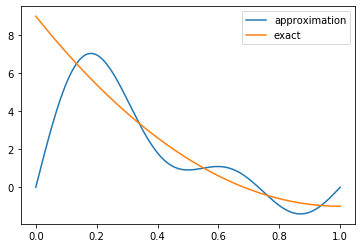

In [14]:
N = 3
import sympy as sym
x = sym.Symbol('x')
psi = [sym.sin(sym.pi*(i+1)*x) for i in range(N+1)]
f = 10*(x-1)**2 - 1
Omega = [0, 1]
u, c = least_squares(f, psi, Omega)
comparison_plot(f, u, Omega)

[Figure](#fem:approx:global:fig:parabola:sine1) (left) shows the oscillatory approximation
of $\sum_{j=0}^Nc_j\sin ((j+1)\pi x)$ when $N=3$.
Changing $N$ to 11 improves the approximation considerably, see
[Figure](#fem:approx:global:fig:parabola:sine1) (right).

<!-- dom:FIGURE: [fig/parabola_ls_sines4_12.png, width=800]  Best approximation of a parabola by a sum of 3 (left) and 11 (right) sine functions.  <div id="fem:approx:global:fig:parabola:sine1"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:fig:parabola:sine1"></div>

<p>Best approximation of a parabola by a sum of 3 (left) and 11 (right) sine functions.</p>
<img src="fig/parabola_ls_sines4_12.png" width=800>

<!-- end figure -->


There is an error $f(0)-u(0)=9$ at $x=0$ in [Figure](#fem:approx:global:fig:parabola:sine1) regardless of how large $N$ is, because all ${\psi}_i(0)=0$ and hence
$u(0)=0$. We may help the approximation to be correct at $x=0$ by
seeking

<!-- Equation labels as ordinary links -->
<div id="_auto21"></div>

$$
\begin{equation}
u(x) = f(0) + \sum_{j\in{\mathcal{I}_s}} c_j{\psi}_j(x)
{\thinspace .}
\label{_auto21} \tag{49}
\end{equation}
$$

However, this adjustment introduces a new problem at $x=1$ since
we now get an error $f(1)-u(1)=f(1)-0=-1$ at this point. A more
clever adjustment is to replace the $f(0)$ term by a term that
is $f(0)$ at $x=0$ and $f(1)$ at $x=1$. A simple linear combination
$f(0)(1-x) + xf(1)$ does the job:

<!-- Equation labels as ordinary links -->
<div id="_auto22"></div>

$$
\begin{equation}
u(x) = f(0)(1-x) + xf(1) + \sum_{j\in{\mathcal{I}_s}} c_j{\psi}_j(x)
{\thinspace .}
\label{_auto22} \tag{50}
\end{equation}
$$

This adjustment of $u$ alters the linear system slightly. In the general
case, we set

$$
u(x) = B(x) +  \sum_{j\in{\mathcal{I}_s}} c_j{\psi}_j(x),
$$

and the linear system becomes

$$
\sum_{j\in{\mathcal{I}_s}}({\psi}_i,{\psi}_j)c_j = (f-B,{\psi}_i),\quad i\in{\mathcal{I}_s}{\thinspace .}
$$

The calculations can still utilize the `least_squares` or
`least_squares_orth` functions, but solve for $u-b$:

In [17]:
from src.approx1D import least_squares_orth

f0 = 0;  f1 = -1
b = f0*(1-x) + x*f1
u_sum, c = least_squares_orth(f-b, psi, Omega)
u = B + u_sum

...evaluating matrix... (0,0)
(1,1)
(2,2)
(3,3)
A:
 [1/2, 1/2, 1/2, 1/2] 
b:
 [-40/pi**3 + 9/pi, 9/(2*pi), -40/(27*pi**3) + 3/pi, 9/(4*pi)]
coeff: [-80/pi**3 + 18/pi, 9/pi, -80/(27*pi**3) + 6/pi, 9/(2*pi)]
approximation: (-80/pi**3 + 18/pi)*sin(pi*x) + 9*sin(2*pi*x)/pi + (-80/(27*pi**3) + 6/pi)*sin(3*pi*x) + 9*sin(4*pi*x)/(2*pi)


[Figure](#fem:approx:global:fig:parabola:sine2) shows the result
of the technique for
ensuring the right boundary values. Even 3 sines can now adjust the
$f(0)(1-x) + xf(1)$ term such that $u$ approximates the parabola really
well, at least visually.

<!-- dom:FIGURE: [fig/parabola_ls_sines4_12_wfterm.png, width=800]  Best approximation of a parabola by a sum of 3 (left) and 11 (right) sine functions with a boundary term.  <div id="fem:approx:global:fig:parabola:sine2"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:fig:parabola:sine2"></div>

<p>Best approximation of a parabola by a sum of 3 (left) and 11 (right) sine functions with a boundary term.</p>
<img src="fig/parabola_ls_sines4_12_wfterm.png" width=800>

<!-- end figure -->



## Orthogonal basis functions
<div id="fem:approx:global:orth"></div>

The choice of sine functions ${\psi}_i(x)=\sin ((i+1)\pi x)$ has a great
computational advantage: on $\Omega=[0,1]$ these basis functions are
*orthogonal*, implying that $A_{i,j}=0$ if $i\neq j$. In fact, when
$V$ contains the basic functions used in a Fourier series expansion,
the approximation method derived in the section [Approximation principles](#fem:approx:global) results in the classical Fourier series for $f(x)$.

With orthogonal basis functions we can make the
`least_squares` function (much) more efficient since we know that
the matrix is diagonal and only the diagonal elements need to be computed:

In [18]:
def least_squares_orth(f, psi, Omega):
    N = len(psi) - 1
    A = [0]*(N+1)
    b = [0]*(N+1)
    x = sym.Symbol('x')
    for i in range(N+1):
        A[i] = sym.integrate(psi[i]**2, (x, Omega[0], Omega[1]))
        b[i] = sym.integrate(psi[i]*f,  (x, Omega[0], Omega[1]))
    c = [b[i]/A[i] for i in range(len(b))]
    u = 0
    for i in range(len(psi)):
        u += c[i]*psi[i]
    return u, c

As mentioned in the section [Implementation of the least squares method](#fem:approx:global:LS:code), symbolic integration
may fail or take a very long time. It is therefore natural to extend the
implementation above with a version where we can choose between symbolic
and numerical integration and fall back on the latter if the former
fails:

In [19]:
def least_squares_orth(f, psi, Omega, symbolic=True):
    N = len(psi) - 1
    A = [0]*(N+1)       # plain list to hold symbolic expressions
    b = [0]*(N+1)
    x = sym.Symbol('x')
    for i in range(N+1):
        # Diagonal matrix term
        A[i] = sym.integrate(psi[i]**2, (x, Omega[0], Omega[1]))

        # Right-hand side term
        integrand = psi[i]*f
        if symbolic:
            I = sym.integrate(integrand,  (x, Omega[0], Omega[1]))
        if not symbolic or isinstance(I, sym.Integral):
            print(('numerical integration of', integrand))
            integrand = sym.lambdify([x], integrand, 'mpmath')
            I = mpmath.quad(integrand, [Omega[0], Omega[1]])
        b[i] = I
    c = [b[i]/A[i] for i in range(len(b))]
    u = 0
    u = sum(c[i]*psi[i] for i in range(len(psi)))
    return u, c

This function is found in the file [`approx1D.py`](src/approx1D.py). Observe that
we here assume that
$\int_\Omega{\varphi}_i^2{\, \mathrm{d}x}$ can always be symbolically computed,
which is not an unreasonable assumption
when the basis functions are orthogonal, but there is no guarantee,
so an improved version of the function above would implement
numerical integration also for the `A[i,i]` term.

## Numerical computations

Sometimes the basis functions ${\psi}_i$ and/or the function $f$
have a nature that makes symbolic integration CPU-time
consuming or impossible.
Even though we implemented a fallback on numerical integration
of $\int f{\varphi}_i {\, \mathrm{d}x}$, considerable time might still be required
by `sympy` just by *attempting* to integrate symbolically.
Therefore, it will be handy to have a function for fast
*numerical integration and numerical solution
of the linear system*. Below is such a method. It requires
Python functions `f(x)` and `psi(x,i)` for $f(x)$ and ${\psi}_i(x)$
as input. The output is a mesh function
with values `u` on the mesh with points in the array `x`.
Three numerical integration methods are offered:
`scipy.integrate.quad` (precision set to $10^{-8}$),
`mpmath.quad` (about machine precision), and a Trapezoidal
rule based on the points in `x` (unknown accuracy, but
increasing with the number of mesh points in `x`).

In [20]:
def least_squares_numerical(f, psi, N, x,
                            integration_method='scipy',
                            orthogonal_basis=False):
    import scipy.integrate
    A = np.zeros((N+1, N+1))
    b = np.zeros(N+1)
    Omega = [x[0], x[-1]]
    dx = x[1] - x[0]       # assume uniform partition

    for i in range(N+1):
        j_limit = i+1 if orthogonal_basis else N+1
        for j in range(i, j_limit):
            print(('(%d,%d)' % (i, j)))
            if integration_method == 'scipy':
                A_ij = scipy.integrate.quad(
                    lambda x: psi(x,i)*psi(x,j),
                    Omega[0], Omega[1], epsabs=1E-9, epsrel=1E-9)[0]
            elif integration_method == 'sympy':
                A_ij = mpmath.quad(
                    lambda x: psi(x,i)*psi(x,j),
                    [Omega[0], Omega[1]])
            else:
                values = psi(x,i)*psi(x,j)
                A_ij = trapezoidal(values, dx)
            A[i,j] = A[j,i] = A_ij

        if integration_method == 'scipy':
            b_i = scipy.integrate.quad(
                lambda x: f(x)*psi(x,i), Omega[0], Omega[1],
                epsabs=1E-9, epsrel=1E-9)[0]
        elif integration_method == 'sympy':
            b_i = mpmath.quad(
                lambda x: f(x)*psi(x,i), [Omega[0], Omega[1]])
        else:
            values = f(x)*psi(x,i)
            b_i = trapezoidal(values, dx)
        b[i] = b_i

    c = b/np.diag(A) if orthogonal_basis else np.linalg.solve(A, b)
    u = sum(c[i]*psi(x, i) for i in range(N+1))
    return u, c

def trapezoidal(values, dx):
    """Integrate values by the Trapezoidal rule (mesh size dx)."""
    return dx*(np.sum(values) - 0.5*values[0] - 0.5*values[-1])

Here is an example on calling the function:

In [22]:
def psi(x, i):
    return np.sin((i+1)*x)

x = np.linspace(0, 2*pi, 501)
N = 20
u, c = least_squares_numerical(lambda x: np.tanh(x-np.pi), psi, N, x,
                               orthogonal_basis=True)

(0,0)
(1,1)
(2,2)
(3,3)
(4,4)
(5,5)
(6,6)
(7,7)
(8,8)
(9,9)
(10,10)
(11,11)
(12,12)
(13,13)
(14,14)
(15,15)
(16,16)
(17,17)
(18,18)
(19,19)
(20,20)


**Remark.**
The `scipy.integrate.quad` integrator is usually much faster than
`mpmath.quad`.

# Interpolation

## The interpolation (or collocation) principle
<div id="fem:approx:global:interp"></div>


The principle of minimizing the distance between $u$ and $f$ is
an intuitive way of computing a best approximation $u\in V$ to $f$.
However, there are other approaches as well.
One is to demand that $u(x_{i}) = f(x_{i})$ at some selected points
$x_{i}$, $i\in{\mathcal{I}_s}$:

<!-- Equation labels as ordinary links -->
<div id="_auto24"></div>

$$
\begin{equation}
u(x_{i}) = \sum_{j\in{\mathcal{I}_s}} c_j {\psi}_j(x_{i}) = f(x_{i}),
\quad i\in{\mathcal{I}_s}{\thinspace .}  \label{_auto24} \tag{52}
\end{equation}
$$

We recognize that the equation $\sum_j c_j {\psi}_j(x_{i}) = f(x_{i})$
is actually a linear system with $N+1$ unknown coefficients $\left\{ {c}_j \right\}_{j\in{\mathcal{I}_s}}$:

<!-- Equation labels as ordinary links -->
<div id="_auto25"></div>

$$
\begin{equation}
\sum_{j\in{\mathcal{I}_s}} A_{i,j}c_j = b_i,\quad i\in{\mathcal{I}_s},
\label{_auto25} \tag{53}
\end{equation}
$$

with coefficient matrix and right-hand side vector given by

<!-- Equation labels as ordinary links -->
<div id="_auto26"></div>

$$
\begin{equation}
A_{i,j} = {\psi}_j(x_{i}),
\label{_auto26} \tag{54}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto27"></div>

$$
\begin{equation} 
b_i = f(x_{i}){\thinspace .}   \label{_auto27} \tag{55}
\end{equation}
$$

This time the coefficient matrix is not symmetric because
${\psi}_j(x_{i})\neq {\psi}_i(x_{j})$ in general.
The method is often referred to as an *interpolation method*
since some point values of $f$ are given ($f(x_{i})$) and we
fit a continuous function $u$ that goes through the $f(x_{i})$ points.
In this case the $x_{i}$ points are called *interpolation points*.
When the same approach is used to approximate differential equations,
one usually applies the name *collocation method* and
$x_{i}$ are known as *collocation points*.

Given $f$  as a `sympy` symbolic expression `f`, $\left\{ {{\psi}}_i \right\}_{i\in{\mathcal{I}_s}}$
as a list `psi`, and a set of points $\left\{ {x}_i \right\}_{i\in{\mathcal{I}_s}}$  as a list or array
`points`, the following Python function sets up and solves the matrix system
for the coefficients $\left\{ {c}_i \right\}_{i\in{\mathcal{I}_s}}$:

In [23]:
def interpolation(f, psi, points):
    N = len(psi) - 1
    A = sym.zeros(N+1, N+1)
    b = sym.zeros(N+1, 1)
    psi_sym = psi  # save symbolic expression
    x = sym.Symbol('x')
    psi = [sym.lambdify([x], psi[i], 'mpmath') for i in range(N+1)]
    f = sym.lambdify([x], f, 'mpmath')
    for i in range(N+1):
        for j in range(N+1):
            A[i,j] = psi[j](points[i])
        b[i,0] = f(points[i])
    c = A.LUsolve(b)
    # c is a sympy Matrix object, turn to list
    c = [sym.simplify(c[i,0]) for i in range(c.shape[0])]
    u = sym.simplify(sum(c[i]*psi_sym[i] for i in range(N+1)))
    return u, c

The `interpolation` function is a part of the [`approx1D`](src/approx1D.py)
module.


We found it convenient in the above function to turn the expressions `f` and
`psi` into ordinary Python functions of `x`, which can be called with
`float` values in the list `points` when building the matrix and
the right-hand side. The alternative is to use the `subs` method
to substitute the `x` variable in an expression by an element from
the `points` list. The following session illustrates both approaches
in a simple setting:

In [24]:
x = sym.Symbol('x')
e = x**2              # symbolic expression involving x
p = 0.5               # a value of x
v = e.subs(x, p)      # evaluate e for x=p
v

0.250000000000000

In [25]:
type(v)

sympy.core.numbers.Float

In [26]:
e = lambdify([x], e)  # make Python function of e
type(e)
function
v = e(p)              # evaluate e(x) for x=p
v

0.25

In [27]:
type(v)

float

A nice feature of the interpolation or collocation method is that it
avoids computing integrals. However, one has to decide on the location
of the $x_{i}$ points.  A simple, yet common choice, is to
distribute them uniformly throughout the unit interval.

### Example

Let us illustrate the interpolation method by approximating
our parabola $f(x)=10(x-1)^2-1$ by a linear function on $\Omega=[1,2]$,
using two collocation points $x_0=1+1/3$ and $x_1=1+2/3$:

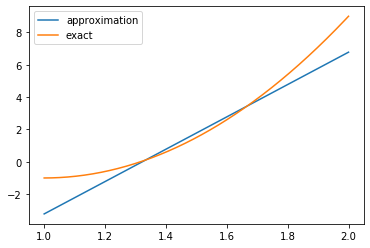

In [28]:
x = sym.Symbol('x')
f = 10*(x-1)**2 - 1
psi = [1, x]
Omega = [1, 2]
points = [1 + sym.Rational(1,3), 1 + sym.Rational(2,3)]
u, c = interpolation(f, psi, points)
comparison_plot(f, u, Omega)

The resulting linear system becomes

$$
\left(\begin{array}{ll}
1 & 4/3\\
1 & 5/3\\
\end{array}\right)
\left(\begin{array}{l}
c_0\\
c_1\\
\end{array}\right)
=
\left(\begin{array}{l}
1/9\\
31/9\\
\end{array}\right)
$$

with solution $c_0=-119/9$ and $c_1=10$.
[Figure](#fem:approx:global:linear:interp:fig1) (left) shows the resulting
approximation $u=-119/9 + 10x$.
We can easily test other interpolation points, say $x_0=1$ and $x_1=2$.
This changes the line quite significantly, see
[Figure](#fem:approx:global:linear:interp:fig1) (right).

<!-- dom:FIGURE: [fig/parabola_inter.png, width=800]  Approximation of a parabola by linear functions computed by two interpolation points: 4/3 and 5/3 (left) versus 1 and 2 (right).  <div id="fem:approx:global:linear:interp:fig1"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:linear:interp:fig1"></div>

<p>Approximation of a parabola by linear functions computed by two interpolation points: 4/3 and 5/3 (left) versus 1 and 2 (right).</p>
<img src="fig/parabola_inter.png" width=800>

<!-- end figure -->



## Lagrange polynomials
<div id="fem:approx:global:Lagrange"></div>

In the section [Fourier series](#fem:approx:global:Fourier) we explained the advantage
of having a diagonal matrix: formulas for the coefficients
$\left\{ {c}_i \right\}_{i\in{\mathcal{I}_s}}$ can then be derived by hand. For an interpolation (or
collocation) method a diagonal matrix implies that ${\psi}_j(x_{i})
= 0$ if $i\neq j$. One set of basis functions ${\psi}_i(x)$ with this
property is the *Lagrange interpolating polynomials*, or just
*Lagrange polynomials*. (Although the functions are named after
Lagrange, they were first discovered by Waring in 1779, rediscovered
by Euler in 1783, and published by Lagrange in 1795.)  Lagrange
polynomials are key building blocks in the finite element method, so
familiarity with these polynomials will be required anyway.

A Lagrange polynomial can be written as

<!-- Equation labels as ordinary links -->
<div id="fem:approx:global:Lagrange:poly"></div>

$$
\begin{equation}
{\psi}_i(x) =
\prod_{j=0,j\neq i}^N
\frac{x-x_{j}}{x_{i}-x_{j}}
= \frac{x-x_0}{x_{i}-x_0}\cdots\frac{x-x_{i-1}}{x_{i}-x_{i-1}}\frac{x-x_{i+1}}{x_{i}-x_{i+1}}
\cdots\frac{x-x_N}{x_{i}-x_N},
\label{fem:approx:global:Lagrange:poly} \tag{56}
\end{equation}
$$

for $i\in{\mathcal{I}_s}$.
We see from ([56](#fem:approx:global:Lagrange:poly)) that all the ${\psi}_i$
functions are polynomials of degree $N$ which have the property

<!-- Equation labels as ordinary links -->
<div id="fem:inter:prop"></div>

$$
\begin{equation}
{\psi}_i(x_s) = \delta_{is},\quad \delta_{is} =
\left\lbrace\begin{array}{ll}
1, & i=s,\\
0, & i\neq s,
\end{array}\right.
\label{fem:inter:prop} \tag{57}
\end{equation}
$$

when $x_s$ is an interpolation (collocation) point.
Here we have used the *Kronecker delta* symbol $\delta_{is}$.
This property implies that $A$ is a diagonal matrix, i.e., $A_{i,j}=0$ for $i\neq j$ and
$A_{i,j}=1$ when $i=j$. The solution of the linear system is
then simply

<!-- Equation labels as ordinary links -->
<div id="_auto28"></div>

$$
\begin{equation}
c_i = f(x_{i}),\quad i\in{\mathcal{I}_s},
\label{_auto28} \tag{58}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto29"></div>

$$
\begin{equation}
u(x) = \sum_{j\in{\mathcal{I}_s}} c_i {\psi}_i(x) = \sum_{j\in{\mathcal{I}_s}} f(x_{i}){\psi}_i(x){\thinspace .}   \label{_auto29} \tag{59}
\end{equation}
$$

We remark however that ([57](#fem:inter:prop)) does not necessarily imply that the matrix
obtained by the least squares or projection methods is diagonal.


The following function computes the Lagrange interpolating polynomial
${\psi}_i(x)$ on the unit interval (0,1), given the interpolation points $x_{0},\ldots,x_{N}$ in
the list or array `points`:

In [29]:
def Lagrange_polynomial(x, i, points):
    p = 1
    for k in range(len(points)):
        if k != i:
            p *= (x - points[k])/(points[i] - points[k])
    return p

The next function computes a complete basis, ${\psi}_0,\ldots,{\psi}_N$, using equidistant points throughout
$\Omega$:

In [30]:
def Lagrange_polynomials_01(x, N):
    if isinstance(x, sym.Symbol):
        h = sym.Rational(1, N-1)
    else:
        h = 1.0/(N-1)
    points = [i*h for i in range(N)]
    psi = [Lagrange_polynomial(x, i, points) for i in range(N)]
    return psi, points

When `x` is a `sym.Symbol` object, we let the spacing between the
interpolation points, `h`, be a `sympy` rational number, so that we
get nice end results in the formulas for ${\psi}_i$.  The other case,
when `x` is a plain Python `float`, signifies numerical computing, and
then we let `h` be a floating-point number.  Observe that the
`Lagrange_polynomial` function works equally well in the symbolic and
numerical case - just think of `x` being a `sym.Symbol` object or a
Python `float`.  A little interactive session illustrates the
difference between symbolic and numerical computing of the basis
functions and points:

In [31]:
x = sym.Symbol('x')
psi, points = Lagrange_polynomials_01(x, N=2)
points

[0, 1]

In [32]:
psi

[1 - x, x]

In [33]:
x = 0.5  # numerical computing
psi, points = Lagrange_polynomials_01(x, N=2)
points

[0.0, 1.0]

In [34]:
psi

[0.5, 0.5]

That is, when used symbolically, the `Lagrange_polynomials_01`
function returns the symbolic expression for the Lagrange functions
while when `x` is a numerical value the function returns the value of
the basis function evaluate in `x`.  In the present example only the
second basis function should be 1 in the mid-point while the others
are zero according to ([57](#fem:inter:prop)).


### Approximation of a polynomial

The Galerkin or least squares methods lead to an exact approximation
if $f$ lies in the space spanned by the basis functions. It could be
of interest to see how the interpolation method with Lagrange
polynomials as the basis is able to approximate a polynomial, e.g., a
parabola. Running

In [37]:
x = sym.Symbol('x')
for N in 2, 4, 5, 6, 8, 10, 12:
    f = x**2
    psi, points = Lagrange_polynomials_01(x, N)
    u = interpolation(f, psi, points)

shows the result that up to `N=4` we achieve an exact approximation,
and then round-off errors start to grow, such that
`N=15` leads to a 15-degree polynomial for $u$ where
the coefficients in front of $x^r$ for $r>2$ are
of size $10^{-5}$ and smaller. As the matrix is ill-conditioned
and we use floating-point arithmetic, we do not obtain the exact
solution. Still, we get  a solution that is visually identical to the
exact solution. The reason is that the ill-conditioning causes
the system to have many solutions very close to the true solution.
While we are lucky for `N=15` and obtain a solution that is
visually identical to the true solution, ill-conditioning may also
result in completely wrong results. As we continue with higher values,  `N=20` reveals that the
procedure is starting to fall apart as the approximate solution is around 0.9 at $x=1.0$,
where it should have
been $1.0$. At `N=30` the approximate solution is around $5\cdot10^8 $ at $x=1$.


### Successful example

Trying out the Lagrange polynomial basis for approximating
$f(x)=\sin 2\pi x$ on $\Omega =[0,1]$ with the least squares
and the interpolation techniques can be done by

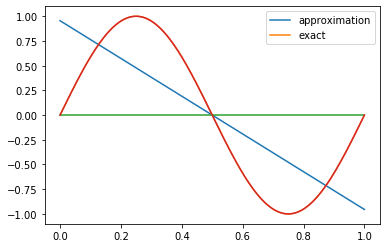

In [36]:
x = sym.Symbol('x')
f = sym.sin(2*sym.pi*x)
psi, points = Lagrange_polynomials_01(x, N)
Omega=[0, 1]
u, c = least_squares(f, psi, Omega)
comparison_plot(f, u, Omega)
u, c = interpolation(f, psi, points)
comparison_plot(f, u, Omega)

[Figure](#fem:approx:global:Lagrange:fig:sine:ls:colloc) shows the results.
There is a difference between the least squares and the interpolation
technique but the difference decreases rapidly with  increasing $N$.

<!-- dom:FIGURE: [fig/Lagrange_ls_interp_sin_4.png, width=800]  Approximation via least squares (left) and interpolation (right) of a sine function by Lagrange interpolating polynomials of degree 3. <div id="fem:approx:global:Lagrange:fig:sine:ls:colloc"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:Lagrange:fig:sine:ls:colloc"></div>

<p>Approximation via least squares (left) and interpolation (right) of a sine function by Lagrange interpolating polynomials of degree 3.</p>
<img src="fig/Lagrange_ls_interp_sin_4.png" width=800>

<!-- end figure -->



### Less successful example

The next example concerns interpolating $f(x)=|1-2x|$ on $\Omega
=[0,1]$ using Lagrange polynomials. [Figure](#fem:approx:global:Lagrange:fig:abs:Lag:unif:7:14) shows a peculiar
effect: the approximation starts to oscillate more and more as $N$
grows. This numerical artifact is not surprising when looking at the
individual Lagrange polynomials. [Figure](#fem:approx:global:Lagrange:fig:abs:Lag:unif:osc) shows two such
polynomials, $\psi_2(x)$ and $\psi_7(x)$, both of degree 11 and
computed from uniformly spaced points $x_{i}=i/11$,
$i=0,\ldots,11$, marked with circles.  We clearly see the property of
Lagrange polynomials: $\psi_2(x_{i})=0$ and $\psi_7(x_{i})=0$ for
all $i$, except $\psi_2(x_{2})=1$ and $\psi_7(x_{7})=1$.  The most
striking feature, however, is the dominating oscillation near the
boundary where $\psi_2>5$ and $\psi_7=-10$ in some points. The reason is easy to understand: since we force the
functions to be zero at so many points, a polynomial of high degree is
forced to oscillate between the points.  This is called
*Runge's phenomenon* and you can read a more detailed explanation on
[Wikipedia](http://en.wikipedia.org/wiki/Runge%27s_phenomenon).


### Remedy for strong oscillations

The oscillations can be reduced by a more clever choice of
interpolation points, called the *Chebyshev nodes*:

<!-- Equation labels as ordinary links -->
<div id="_auto30"></div>

$$
\begin{equation}
x_{i} = \frac{1}{2} (a+b) + \frac{1}{2}(b-a)\cos\left( \frac{2i+1}{2(N+1)}pi\right),\quad i=0\ldots,N,
\label{_auto30} \tag{60}
\end{equation}
$$

on the interval $\Omega = [a,b]$.
Here is a flexible version of the `Lagrange_polynomials_01` function above,
valid for any interval $\Omega =[a,b]$ and with the possibility to generate
both uniformly distributed points and Chebyshev nodes:

In [39]:
def Lagrange_polynomials(x, N, Omega, point_distribution='uniform'):
    if point_distribution == 'uniform':
        if isinstance(x, sym.Symbol):
            h = sym.Rational(Omega[1] - Omega[0], N)
        else:
            h = (Omega[1] - Omega[0])/float(N)
        points = [Omega[0] + i*h for i in range(N+1)]
    elif point_distribution == 'Chebyshev':
        points = Chebyshev_nodes(Omega[0], Omega[1], N)
    psi = [Lagrange_polynomial(x, i, points) for i in range(N+1)]
    return psi, points

def Chebyshev_nodes(a, b, N):
    from math import cos, pi
    return [0.5*(a+b) + 0.5*(b-a)*cos(float(2*i+1)/(2*(N+1))*pi) \
            for i in range(N+1)]

All the functions computing Lagrange polynomials listed
above are found in the module file `Lagrange.py`.

[Figure](#fem:approx:global:Lagrange:fig:abs:Lag:Cheb:7:14) shows the
improvement of using Chebyshev nodes, compared with the equidistant
points in [Figure](#fem:approx:global:Lagrange:fig:abs:Lag:unif:7:14).  The reason for
this improvement is that the corresponding Lagrange polynomials have
much smaller oscillations, which can be seen by comparing [Figure](#fem:approx:global:Lagrange:fig:abs:Lag:Cheb:osc) (Chebyshev
points) with [Figure](#fem:approx:global:Lagrange:fig:abs:Lag:unif:osc) (equidistant
points). Note the different scale on the vertical axes in the two
figures and also that the Chebyshev points tend to cluster
more around the element boundaries.


Another cure for undesired oscillations of higher-degree interpolating
polynomials is to use lower-degree Lagrange polynomials on many small
patches of the domain. This is actually the idea pursued in the finite
element method. For instance, linear Lagrange polynomials on $[0,1/2]$
and $[1/2,1]$ would yield a perfect approximation to $f(x)=|1-2x|$ on
$\Omega = [0,1]$ since $f$ is piecewise linear.

<!-- dom:FIGURE: [fig/Lagrange_interp_abs_8_15.png, width=800]  Interpolation of an absolute value function by Lagrange polynomials and uniformly distributed interpolation points: degree 7 (left) and 14 (right).  <div id="fem:approx:global:Lagrange:fig:abs:Lag:unif:7:14"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:Lagrange:fig:abs:Lag:unif:7:14"></div>

<p>Interpolation of an absolute value function by Lagrange polynomials and uniformly distributed interpolation points: degree 7 (left) and 14 (right).</p>
<img src="fig/Lagrange_interp_abs_8_15.png" width=800>

<!-- end figure -->


<!-- dom:FIGURE: [fig/Lagrange_basis_12.png, width=400]  Illustration of the oscillatory behavior of two Lagrange polynomials based on 12 uniformly spaced points (marked by circles).  <div id="fem:approx:global:Lagrange:fig:abs:Lag:unif:osc"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:Lagrange:fig:abs:Lag:unif:osc"></div>

<p>Illustration of the oscillatory behavior of two Lagrange polynomials based on 12 uniformly spaced points (marked by circles).</p>
<img src="fig/Lagrange_basis_12.png" width=400>

<!-- end figure -->



<!-- dom:FIGURE: [fig/Lagrange_interp_abs_Cheb_8_15.png, width=800]  Interpolation of an absolute value function by Lagrange polynomials and Chebyshev nodes as interpolation points: degree 7 (left) and 14 (right).  <div id="fem:approx:global:Lagrange:fig:abs:Lag:Cheb:7:14"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:Lagrange:fig:abs:Lag:Cheb:7:14"></div>

<p>Interpolation of an absolute value function by Lagrange polynomials and Chebyshev nodes as interpolation points: degree 7 (left) and 14 (right).</p>
<img src="fig/Lagrange_interp_abs_Cheb_8_15.png" width=800>

<!-- end figure -->


<!-- dom:FIGURE: [fig/Lagrange_basis_Cheb_12.png, width=400]  Illustration of the less oscillatory behavior of two Lagrange polynomials based on 12 Chebyshev points (marked by circles).  <div id="fem:approx:global:Lagrange:fig:abs:Lag:Cheb:osc"></div> Note that the y-axis is different from [Figure](#fem:approx:global:Lagrange:fig:abs:Lag:unif:osc). -->
<!-- begin figure -->
<div id="fem:approx:global:Lagrange:fig:abs:Lag:Cheb:osc"></div>

<p>Illustration of the less oscillatory behavior of two Lagrange polynomials based on 12 Chebyshev points (marked by circles). Note that the y-axis is different from [Figure](#fem:approx:global:Lagrange:fig:abs:Lag:unif:osc).</p>
<img src="fig/Lagrange_basis_Cheb_12.png" width=400>

<!-- end figure -->


How does the least squares or projection methods work with Lagrange
polynomials?
We can just call the `least_squares` function, but
`sympy` has problems integrating the $f(x)=|1-2x|$
function times a polynomial, so we need to fall back on numerical
integration.

In [40]:
def least_squares(f, psi, Omega):
    N = len(psi) - 1
    A = sym.zeros(N+1, N+1)
    b = sym.zeros(N+1, 1)
    x = sym.Symbol('x')
    for i in range(N+1):
        for j in range(i, N+1):
            integrand = psi[i]*psi[j]
            I = sym.integrate(integrand, (x, Omega[0], Omega[1]))
            if isinstance(I, sym.Integral):
                # Could not integrate symbolically, fall back
                # on numerical integration with mpmath.quad
                integrand = sym.lambdify([x], integrand, 'mpmath')
                I = mpmath.quad(integrand, [Omega[0], Omega[1]])
            A[i,j] = A[j,i] = I
        integrand = psi[i]*f
        I = sym.integrate(integrand, (x, Omega[0], Omega[1]))
        if isinstance(I, sym.Integral):
            integrand = sym.lambdify([x], integrand, 'mpmath')
            I = mpmath.quad(integrand, [Omega[0], Omega[1]])
        b[i,0] = I
    c = A.LUsolve(b)
    c = [sym.simplify(c[i,0]) for i in range(c.shape[0])]
    u = sum(c[i]*psi[i] for i in range(len(psi)))
    return u, c

<!-- Convergence of Lagrange polynomials. -->




<!-- dom:FIGURE: [fig/Lagrange_ls_abs_12.png, width=400]  Illustration of an approximation of the absolute value function using the least square method .  <div id="fem:approx:global:Lagrange:fig:abs:Lag:unif:ls"></div> -->
<!-- begin figure -->
<div id="fem:approx:global:Lagrange:fig:abs:Lag:unif:ls"></div>

<p>Illustration of an approximation of the absolute value function using the least square method .</p>
<img src="fig/Lagrange_ls_abs_12.png" width=400>

<!-- end figure -->





## Bernstein polynomials
<div id="fem:approx:global:Bernstein"></div>

An alternative to the Taylor and Lagrange families of polynomials
are the Bernstein polynomials.
These polynomials are popular in visualization and we include a
presentation of them for completeness. Furthermore, as we
will demonstrate, the choice of basis functions may matter
in terms of accuracy and efficiency.
In fact, in finite element methods,
a main challenge, from a numerical analysis point of view,
is to determine appropriate basis functions for
a particular purpose or equation.

On the unit interval, the Bernstein
polynomials are defined in terms of powers of $x$ and $1-x$
(the barycentric coordinates of the unit interval) as

<!-- Equation labels as ordinary links -->
<div id="bernstein:basis"></div>

$$
\begin{equation}
B_{i,n} = \binom{n}{i} x^i (1-x)^{n-i}, \quad i=0, \ldots, n .
\label{bernstein:basis} \tag{61}
\end{equation}
$$

<!-- dom:FIGURE: [fig/Bernstein_basis8.png] The nine functions of a Bernstein basis of order 8. <div id="Bernstein_basis_8"></div> -->
<!-- begin figure -->
<div id="Bernstein_basis_8"></div>

<p>The nine functions of a Bernstein basis of order 8.</p>
<img src="fig/Bernstein_basis8.png" >

<!-- end figure -->


<!-- dom:FIGURE: [fig/Lagrange_basis8.png] The nine functions of a Lagrange basis of order 8. <div id="Lagrange_basis_8"></div> -->
<!-- begin figure -->
<div id="Lagrange_basis_8"></div>

<p>The nine functions of a Lagrange basis of order 8.</p>
<img src="fig/Lagrange_basis8.png" >

<!-- end figure -->




The [Figure](#Bernstein_basis_8) shows the  basis functions of a Bernstein basis of order 8.
This figure should be compared against [Figure](#Lagrange_basis_8), which
shows the corresponding Lagrange basis of order 8.
The Lagrange basis is convenient because it is a nodal basis, that is; the basis functions are 1 in their nodal points and zero at all other nodal points as described by ([57](#fem:inter:prop)).
However, looking at [Figure](#Lagrange_basis_8)
we also notice that the basis function are oscillatory and have absolute
values that are significantly larger than 1 between the nodal points.
Consider for instance the basis function represented by the purple color.
It is 1 at $x=0.5$ and 0 at all other nodal points
and hence this basis function represents the value at the mid-point.
However, this function also has strong
negative contributions close to the element boundaries where
it takes negative values lower than $-2$.
For the Bernstein basis, all  functions are positive and
all functions output values in $[0,1]$. Therefore there is no oscillatory behavior.
The main disadvantage of the Bernstein basis is that the basis is not
a nodal basis. In fact, all functions contribute everywhere except $x=0$ and $x=1$.


**Notice.**

We have considered approximation with a sinusoidal basis and with  Lagrange or Bernstein polynomials,
all of which are frequently used for scientific computing. The Lagrange polynomials (of various
order) are extensively used in finite element methods, while the Bernstein polynomials are more used
in computational geometry. The Lagrange and the Bernstein families are, however, but a few in the jungle of polynomial
spaces used for finite element computations and their efficiency and accuracy can vary quite substantially.
Furthermore, while a method may be efficient and accurate for one type of PDE it might not even converge for
another type of PDE.  The development and analysis of finite element methods for different purposes is currently an intense research field
and has been so for several decades.
FEniCS has implemented a wide range of polynomial spaces and has a general
framework for implementing new elements. While finite element methods
explore different families of polynomials, the so-called spectral methods explore the use
of sinusoidal functions or polynomials with high order. From an abstract point of view, the different methods
can all be obtained simply by changing the basis for the trial and test functions. However, their
efficiency and accuracy may vary substantially.

# Approximation of functions in higher dimensions
<div id="fem:approx:2D"></div>

All the concepts and algorithms developed for approximation of 1D functions
$f(x)$ can readily be extended to 2D functions $f(x,y)$ and 3D functions
$f(x,y,z)$. Basically, the extensions consist of defining basis functions
${\psi}_i(x,y)$ or ${\psi}_i(x,y,z)$ over some domain $\Omega$, and
for the least squares and Galerkin methods, the integration is done over
$\Omega$.

As in 1D, the least squares and projection/Galerkin methods
lead to linear systems

$$
\begin{align*}
\sum_{j\in{\mathcal{I}_s}} A_{i,j}c_j &= b_i,\quad i\in{\mathcal{I}_s},\\
A_{i,j} &= ({\psi}_i,{\psi}_j),\\
b_i &= (f,{\psi}_i),
\end{align*}
$$

where the inner product of two functions $f(x,y)$ and $g(x,y)$ is defined
completely analogously to the 1D case ([25](#fem:approx:LS:innerprod)):

<!-- Equation labels as ordinary links -->
<div id="_auto31"></div>

$$
\begin{equation}
(f,g) = \int_\Omega f(x,y)g(x,y) dx dy .
\label{_auto31} \tag{64}
\end{equation}
$$

## 2D basis functions as tensor products of 1D functions
<div id="fem:approx:2D:global"></div>



One straightforward way to construct a basis in 2D is to combine 1D
basis functions. Say we have the 1D vector space

<!-- Equation labels as ordinary links -->
<div id="fem:approx:2D:Vx"></div>

$$
\begin{equation}
V_x = \mbox{span}\{ \hat{\psi}_0(x),\ldots,\hat{\psi}_{N_x}(x)\}
\label{fem:approx:2D:Vx} \tag{65}
{\thinspace .}
\end{equation}
$$

A similar space for a function's variation in $y$ can be defined,

<!-- Equation labels as ordinary links -->
<div id="fem:approx:2D:Vy"></div>

$$
\begin{equation}
V_y = \mbox{span}\{ \hat{\psi}_0(y),\ldots,\hat{\psi}_{N_y}(y)\}
\label{fem:approx:2D:Vy} \tag{66}
{\thinspace .}
\end{equation}
$$

We can then form 2D basis functions as *tensor products* of 1D basis functions.

**Tensor products.**

Given two vectors $a=(a_0,\ldots,a_M)$ and $b=(b_0,\ldots,b_N)$,
their *outer tensor product*, also called the *dyadic product*,
is $p=a\otimes b$, defined through

$$
p_{i,j}=a_ib_j,\quad i=0,\ldots,M,\ j=0,\ldots,N{\thinspace .}
$$

In the tensor terminology,
$a$ and $b$ are first-order tensors (vectors with one index, also termed
rank-1 tensors), and then their outer
tensor product is a second-order tensor (matrix with two indices, also
termed rank-2 tensor). The
corresponding *inner tensor product* is the well-known scalar or dot
product of two vectors: $p=a\cdot b = \sum_{j=0}^N a_jb_j$. Now,
$p$ is a rank-0 tensor.


Tensors are typically represented by arrays in computer code.
In the above example, $a$ and $b$ are represented by
one-dimensional arrays of length
$M$ and $N$, respectively, while $p=a\otimes b$ must be represented
by a two-dimensional array of size $M\times N$.

[Tensor products](http://en.wikipedia.org/wiki/Tensor_product) can
be used in a variety of contexts.




<!-- The following is from <http://en.wikipedia.org/wiki/Tensor_product>, -->
<!-- Notation and examples -->
Given the vector spaces $V_x$ and $V_y$ as defined
in ([65](#fem:approx:2D:Vx)) and ([66](#fem:approx:2D:Vy)), the
tensor product space $V=V_x\otimes V_y$ has a basis formed
as the tensor product of the basis for $V_x$ and $V_y$.
That is, if $\left\{ {\psi}_i(x) \right\}_{i\in{\mathcal{I}_x}}$
and $\left\{ {\psi}_i(y) \right\}_{i\in {\mathcal{I}_y}}$ are basis for
$V_x$ and $V_y$, respectively, the elements in the basis for $V$ arise
from the tensor product:
$\left\{ {\psi}_i(x){\psi}_j(y) \right\}_{i\in {\mathcal{I}_x},j\in {\mathcal{I}_y}}$.
The index sets are $I_x=\{0,\ldots,N_x\}$ and $I_y=\{0,\ldots,N_y\}$.

The notation for a basis function in 2D can employ a double index as in

$$
{\psi}_{p,q}(x,y) = \hat{\psi}_p(x)\hat{\psi}_q(y),
\quad p\in{\mathcal{I}_x},q\in{\mathcal{I}_y}{\thinspace .}
$$

The expansion for $u$ is then written as a double sum

$$
u = \sum_{p\in{\mathcal{I}_x}}\sum_{q\in{\mathcal{I}_y}} c_{p,q}{\psi}_{p,q}(x,y){\thinspace .}
$$

Alternatively, we may employ a single index,

$$
{\psi}_i(x,y) = \hat{\psi}_p(x)\hat{\psi}_q(y),
$$

and use the standard form for $u$,

$$
u = \sum_{j\in{\mathcal{I}_s}} c_j{\psi}_j(x,y){\thinspace .}
$$

The single index can be expressed in terms of the double index through
$i=p (N_y+1) + q$ or $i=q (N_x+1) + p$.

## Example on polynomial basis in 2D

Let us again consider an approximation with the least squares method, but now
with basis functions in 2D.
Suppose we choose $\hat{\psi}_p(x)=x^p$, and try an approximation with
$N_x=N_y=1$:

$$
{\psi}_{0,0}=1,\quad {\psi}_{1,0}=x, \quad {\psi}_{0,1}=y,
\quad {\psi}_{1,1}=xy
{\thinspace .}
$$

Using a mapping to one index like $i=q (N_x+1) + p$, we get

$$
{\psi}_0=1,\quad {\psi}_1=x, \quad {\psi}_2=y,\quad{\psi}_3 =xy
{\thinspace .}
$$

With the specific choice $f(x,y) = (1+x^2)(1+2y^2)$ on
$\Omega = [0,L_x]\times [0,L_y]$, we can perform actual calculations:

$$
\begin{align*}
A_{0,0} &= ({\psi}_0,{\psi}_0) = \int_0^{L_y}\int_{0}^{L_x} 1 dxdy = L_{x} L_{y}, \\
A_{0,1} &= ({\psi}_0,{\psi}_1) = \int_0^{L_y}\int_{0}^{L_x} x dxdy = \frac{L_{x}^{2} L_{y}}{2}, \\
A_{0,2} &= ({\psi}_0,{\psi}_2) = \int_0^{L_y}\int_{0}^{L_x} y dxdy = \frac{L_{x} L_{y}^{2}}{2}, \\
A_{0,3} &= ({\psi}_0,{\psi}_3) = \int_0^{L_y}\int_{0}^{L_x} x y dxdy = \frac{L_{x}^{2} L_{y}^{2}}{4}, \\
A_{1,0} &= ({\psi}_1,{\psi}_0) = \int_0^{L_y}\int_{0}^{L_x} x dxdy = \frac{L_{x}^{2} L_{y}}{2}, \\
A_{1,1} &= ({\psi}_1,{\psi}_1) = \int_0^{L_y}\int_{0}^{L_x} x^{2} dxdy = \frac{L_{x}^{3} L_{y}}{3}, \\
A_{1,2} &= ({\psi}_1,{\psi}_2) = \int_0^{L_y}\int_{0}^{L_x} x y dxdy = \frac{L_{x}^{2} L_{y}^{2}}{4}, \\
A_{1,3} &= ({\psi}_1,{\psi}_3) = \int_0^{L_y}\int_{0}^{L_x} x^{2} y dxdy = \frac{L_{x}^{3} L_{y}^{2}}{6}, \\
A_{2,0} &= ({\psi}_2,{\psi}_0) = \int_0^{L_y}\int_{0}^{L_x} y dxdy = \frac{L_{x} L_{y}^{2}}{2}, \\
A_{2,1} &= ({\psi}_2,{\psi}_1) = \int_0^{L_y}\int_{0}^{L_x} x y dxdy = \frac{L_{x}^{2} L_{y}^{2}}{4}, \\
A_{2,2} &= ({\psi}_2,{\psi}_2) = \int_0^{L_y}\int_{0}^{L_x} y^{2} dxdy = \frac{L_{x} L_{y}^{3}}{3}, \\
A_{2,3} &= ({\psi}_2,{\psi}_3) = \int_0^{L_y}\int_{0}^{L_x} x y^{2} dxdy = \frac{L_{x}^{2} L_{y}^{3}}{6}, \\
A_{3,0} &= ({\psi}_3,{\psi}_0) = \int_0^{L_y}\int_{0}^{L_x} x y dxdy = \frac{L_{x}^{2} L_{y}^{2}}{4}, \\
A_{3,1} &= ({\psi}_3,{\psi}_1) = \int_0^{L_y}\int_{0}^{L_x} x^{2} y dxdy = \frac{L_{x}^{3} L_{y}^{2}}{6}, \\
A_{3,2} &= ({\psi}_3,{\psi}_2) = \int_0^{L_y}\int_{0}^{L_x} x y^{2} dxdy = \frac{L_{x}^{2} L_{y}^{3}}{6}, \\
A_{3,3} &= ({\psi}_3,{\psi}_3) = \int_0^{L_y}\int_{0}^{L_x} x^{2} y^{2} dxdy = \frac{L_{x}^{3} L_{y}^{3}}{9}
{\thinspace .}
\end{align*}
$$

The right-hand side vector has the entries

$$
\begin{align*}
b_{0} &= ({\psi}_0,f) = \int_0^{L_y}\int_{0}^{L_x}1\cdot (1+x^2)(1+2y^2) dxdy\\
&= \int_0^{L_y}(1+2y^2)dy \int_{0}^{L_x} (1+x^2)dx
= (L_y + \frac{2}{3}L_y^3)(L_x + \frac{1}{3}L_x^3)\\
b_{1} &= ({\psi}_1,f) = \int_0^{L_y}\int_{0}^{L_x} x(1+x^2)(1+2y^2) dxdy\\
&=\int_0^{L_y}(1+2y^2)dy \int_{0}^{L_x} x(1+x^2)dx
= (L_y + \frac{2}{3}L_y^3)({\frac{1}{2}}L_x^2 + \frac{1}{4}L_x^4)\\
b_{2} &= ({\psi}_2,f) = \int_0^{L_y}\int_{0}^{L_x} y(1+x^2)(1+2y^2) dxdy\\
&= \int_0^{L_y}y(1+2y^2)dy \int_{0}^{L_x} (1+x^2)dx
= ({\frac{1}{2}}L_y^2 + {\frac{1}{2}}L_y^4)(L_x + \frac{1}{3}L_x^3)\\
b_{3} &= ({\psi}_3,f) = \int_0^{L_y}\int_{0}^{L_x} xy(1+x^2)(1+2y^2) dxdy\\
&= \int_0^{L_y}y(1+2y^2)dy \int_{0}^{L_x} x(1+x^2)dx
= ({\frac{1}{2}}L_y^2 + {\frac{1}{2}}L_y^4)({\frac{1}{2}}L_x^2 + \frac{1}{4}L_x^4)
{\thinspace .}
\end{align*}
$$

There is a general pattern in these calculations that we can explore.
An arbitrary matrix entry has the formula

$$
\begin{align*}
A_{i,j} &= ({\psi}_i,{\psi}_j) = \int_0^{L_y}\int_{0}^{L_x}
{\psi}_i{\psi}_j dx dy \\
&= \int_0^{L_y}\int_{0}^{L_x}
{\psi}_{p,q}{\psi}_{r,s} dx dy
= \int_0^{L_y}\int_{0}^{L_x}
\hat{\psi}_p(x)\hat{\psi}_q(y)\hat{\psi}_r(x)\hat{\psi}_s(y) dx dy\\
&= \int_0^{L_y} \hat{\psi}_q(y)\hat{\psi}_s(y)dy
\int_{0}^{L_x} \hat{\psi}_p(x) \hat{\psi}_r(x) dx\\
&= \hat A^{(x)}_{p,r}\hat A^{(y)}_{q,s},
\end{align*}
$$

where

$$
\hat A^{(x)}_{p,r} = \int_{0}^{L_x} \hat{\psi}_p(x) \hat{\psi}_r(x) dx,
\quad
\hat A^{(y)}_{q,s} = \int_0^{L_y} \hat{\psi}_q(y)\hat{\psi}_s(y)dy,
$$

are matrix entries for one-dimensional approximations. Moreover,
$i=p N_x+q$ and $j=s N_y+r$.


With $\hat{\psi}_p(x)=x^p$ we have

$$
\hat A^{(x)}_{p,r} = \frac{1}{p+r+1}L_x^{p+r+1},\quad
\hat A^{(y)}_{q,s} = \frac{1}{q+s+1}L_y^{q+s+1},
$$

and

$$
A_{i,j} = \hat A^{(x)}_{p,r} \hat A^{(y)}_{q,s} =
\frac{1}{p+r+1}L_x^{p+r+1} \frac{1}{q+s+1}L_y^{q+s+1},
$$

for $p,r\in{\mathcal{I}_x}$ and $q,s\in{\mathcal{I}_y}$.

Corresponding reasoning for the right-hand side leads to

$$
\begin{align*}
b_i &= ({\psi}_i,f) = \int_0^{L_y}\int_{0}^{L_x}{\psi}_i f\,dxdx\\
&= \int_0^{L_y}\int_{0}^{L_x}\hat{\psi}_p(x)\hat{\psi}_q(y) f\,dxdx\\
&= \int_0^{L_y}\hat{\psi}_q(y) (1+2y^2)dy
\int_0^{L_y}\hat{\psi}_p(x) (1+x^2)dx\\
&= \int_0^{L_y} y^q (1+2y^2)dy
\int_0^{L_y}x^p (1+x^2)dx\\
&= (\frac{1}{q+1} L_y^{q+1} + \frac{2}{q+3}L_y^{q+3})
(\frac{1}{p+1} L_x^{p+1} + \frac{1}{p+3}L_x^{p+3})
\end{align*}
$$

Choosing $L_x=L_y=2$, we have

$$
A =
\left[\begin{array}{cccc}
4 & 4 & 4 & 4\\
4 & \frac{16}{3} & 4 & \frac{16}{3}\\
4 & 4 & \frac{16}{3} & \frac{16}{3}\\
4 & \frac{16}{3} & \frac{16}{3} & \frac{64}{9}
\end{array}\right],\quad
b = \left[\begin{array}{c}
\frac{308}{9}\\\frac{140}{3}\\44\\60\end{array}\right],
\quad c = \left[
\begin{array}{r}
-\frac{1}{9}\\
- \frac{2}{3}
\frac{4}{3} \\
 8
\end{array}\right]
{\thinspace .}
$$

[Figure](#fem:approx:fe:2D:fig:ubilinear) illustrates the result.

<!-- dom:FIGURE: [fig/approx2D_bilinear.png, width=800] Approximation of a 2D quadratic function (left) by a 2D bilinear function (right) using the Galerkin or least squares method. <div id="fem:approx:fe:2D:fig:ubilinear"></div> -->
<!-- begin figure -->
<div id="fem:approx:fe:2D:fig:ubilinear"></div>

<p>Approximation of a 2D quadratic function (left) by a 2D bilinear function (right) using the Galerkin or least squares method.</p>
<img src="fig/approx2D_bilinear.png" width=800>

<!-- end figure -->



The calculations can also be done using  `sympy`. The following code computes the matrix of our example

In [43]:
import sympy as sym

x, y, Lx, Ly = sym.symbols("x y L_x L_y")

def integral(integrand):
  Ix = sym.integrate(integrand, (x, 0, Lx))
  I = sym.integrate(Ix, (y, 0, Ly))
  return I

basis = [1, x, y, x*y]
A = sym.Matrix(sym.zeros(4,4))

for i in range(len(basis)):
  psi_i = basis[i]
  for j in range(len(basis)):
    psi_j = basis[j]
    A[i,j] = integral(psi_i*psi_j)

We remark that `sympy` may even write the output in LaTeX or C++ format
using the functions  `latex` and  `ccode`.

## Implementation
<div id="fem:approx:2D:global:code"></div>

The `least_squares` function from
the section [Orthogonal basis functions](#fem:approx:global:orth) and/or the
file [`approx1D.py`](src/fe_approx1D.py)
can with very small modifications solve 2D approximation problems.
First, let `Omega` now be a list of the intervals in $x$ and $y$ direction.
For example, $\Omega = [0,L_x]\times [0,L_y]$ can be represented
by `Omega = [[0, L_x], [0, L_y]]`.

Second, the symbolic integration must be extended to 2D:

In [ ]:
# DO NOT RUN THIS CELL, THIS IS A DEMONSTRATION
integrand = psi[i]*psi[j]
I = sym.integrate(integrand,
                 (x, Omega[0][0], Omega[0][1]),
                 (y, Omega[1][0], Omega[1][1]))

provided `integrand` is an expression involving the `sympy` symbols `x`
and `y`.
The 2D version of numerical integration becomes

In [ ]:
# DO NOT RUN THIS CELL, THIS IS A DEMONSTRATION
if isinstance(I, sym.Integral):
    integrand = sym.lambdify([x,y], integrand, 'mpmath')
    I = mpmath.quad(integrand,
                    [Omega[0][0], Omega[0][1]],
                    [Omega[1][0], Omega[1][1]])

The right-hand side integrals are modified in a similar way.
(We should add that `mpmath.quad` is sufficiently fast
even in 2D, but `scipy.integrate.nquad` is much faster.)

Third, we must construct a list of 2D basis functions. Here are two
examples based on tensor products of 1D "Taylor-style" polynomials $x^i$
and 1D sine functions $\sin((i+1)\pi x)$:

In [45]:
def taylor(x, y, Nx, Ny):
    return [x**i*y**j for i in range(Nx+1) for j in range(Ny+1)]

def sines(x, y, Nx, Ny):
    return [sym.sin(sym.pi*(i+1)*x)*sym.sin(sym.pi*(j+1)*y)
            for i in range(Nx+1) for j in range(Ny+1)]

The complete code appears in
[`approx2D.py`](src/fe_approx2D.py).

The previous hand calculation where a quadratic $f$ was approximated by
a bilinear function can be computed symbolically by

In [48]:
from src.approx2D import *

f = (1+x**2)*(1+2*y**2)
psi = taylor(x, y, 1, 1)
Omega = [[0, 2], [0, 2]]
u = least_squares(f, psi, Omega)
print(u)

...evaluating matrix...
(0,0)
(0,1)
(0,2)
(0,3)
(1,1)
(1,2)
(1,3)
(2,2)
(2,3)
(3,3)

('A:\n', Matrix([
[4,    4,    4,    4],
[4, 16/3,    4, 16/3],
[4,    4, 16/3, 16/3],
[4, 16/3, 16/3, 64/9]]), '\nb:\n', Matrix([
[308/9],
[140/3],
[   44],
[   60]]))
('coeff:', [-1/9, 4/3, -2/3, 8])
('approximation:', 8*x*y - 2*x/3 + 4*y/3 - 1/9)
('f:', 2*x**2*y**2 + x**2 + 2*y**2 + 1)
8*x*y - 2*x/3 + 4*y/3 - 1/9


In [49]:
print((sym.expand(f)))

2*x**2*y**2 + x**2 + 2*y**2 + 1


We may continue with adding higher powers to the basis:

In [51]:
psi = taylor(x, y, 2, 2)
u = least_squares(f, psi, Omega)
print(u)

...evaluating matrix...
(0,0)
(0,1)
(0,2)
(0,3)
(0,4)
(0,5)
(0,6)
(0,7)
(0,8)
(1,1)
(1,2)
(1,3)
(1,4)
(1,5)
(1,6)
(1,7)
(1,8)
(2,2)
(2,3)
(2,4)
(2,5)
(2,6)
(2,7)
(2,8)
(3,3)
(3,4)
(3,5)
(3,6)
(3,7)
(3,8)
(4,4)
(4,5)
(4,6)
(4,7)
(4,8)
(5,5)
(5,6)
(5,7)
(5,8)
(6,6)
(6,7)
(6,8)
(7,7)
(7,8)
(8,8)

('A:\n', Matrix([
[   4,    4,   16/3,    4,    4,   16/3,   16/3,   16/3,    64/9],
[   4, 16/3,      8,    4, 16/3,      8,   16/3,   64/9,    32/3],
[16/3,    8,   64/5, 16/3,    8,   64/5,   64/9,   32/3,  256/15],
[   4,    4,   16/3, 16/3, 16/3,   64/9,      8,      8,    32/3],
[   4, 16/3,      8, 16/3, 64/9,   32/3,      8,   32/3,      16],
[16/3,    8,   64/5, 64/9, 32/3, 256/15,   32/3,     16,   128/5],
[16/3, 16/3,   64/9,    8,    8,   32/3,   64/5,   64/5,  256/15],
[16/3, 64/9,   32/3,    8, 32/3,     16,   64/5, 256/15,   128/5],
[64/9, 32/3, 256/15, 32/3,   16,  128/5, 256/15,  128/5, 1024/25]]), '\nb:\n', Matrix([
[    308/9],
[    140/3],
[  3248/45],
[       44],
[       60]

In [52]:
print((u-f))

2*x**2*y**2 + x**2 + 2*y**2 - (x**2 + 1)*(2*y**2 + 1) + 1


For $N_x\geq 2$ and $N_y\geq 2$ we recover the exact function $f$, as
expected, since in that case $f\in V$, see
the section [Perfect approximation](#fem:approx:global:exact1).

## Extension to 3D
<div id="fem:approx:3D:global"></div>

Extension to 3D is in principle straightforward once the 2D extension
is understood. The only major difference is that we need the
repeated outer tensor product,

$$
V = V_x\otimes V_y\otimes V_z{\thinspace .}
$$

In general, given vectors (first-order tensors)
$a^{(q)} = (a^{(q)}_0,\ldots,a^{(q)}_{N_q})$, $q=0,\ldots,m$,
the tensor product $p=a^{(0)}\otimes\cdots\otimes a^{m}$ has
elements

$$
p_{i_0,i_1,\ldots,i_m} = a^{(0)}_{i_1}a^{(1)}_{i_1}\cdots a^{(m)}_{i_m}{\thinspace .}
$$

The basis functions in 3D are then

$$
{\psi}_{p,q,r}(x,y,z) = \hat{\psi}_p(x)\hat{\psi}_q(y)\hat{\psi}_r(z),
$$

with $p\in{\mathcal{I}_x}$, $q\in{\mathcal{I}_y}$, $r\in{\mathcal{I}_z}$. The expansion of $u$ becomes

$$
u(x,y,z) = \sum_{p\in{\mathcal{I}_x}}\sum_{q\in{\mathcal{I}_y}}\sum_{r\in{\mathcal{I}_z}} c_{p,q,r}
{\psi}_{p,q,r}(x,y,z){\thinspace .}
$$

A single index can be introduced also here, e.g., $i=rN_xN_y + qN_x + p$,
$u=\sum_i c_i{\psi}_i(x,y,z)$.

**Use of tensor product spaces.**

Constructing a multi-dimensional space and basis from tensor products
of 1D spaces is a standard technique when working with global basis
functions. In the world of finite elements, constructing basis functions
by tensor products is much used on quadrilateral and hexahedra cell
shapes, but not on triangles and tetrahedra. Also, the global
finite element basis functions are almost exclusively denoted by a single
index and not by the natural tuple of indices that arises from
tensor products.